In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)
from xgboost import XGBClassifier
import shap

> ÌÅ¥Îü¨Ïä§ÌÑ∞

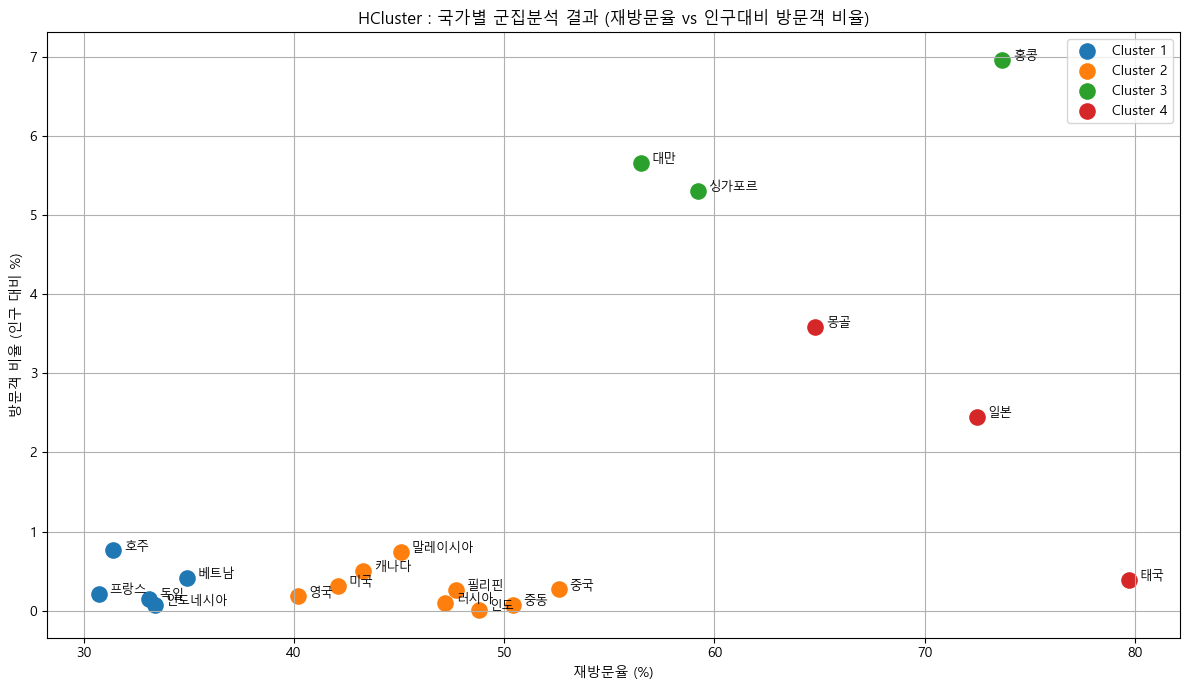

> ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï∂îÏ≤ú Ï¢ÖÏÜçÎ≥ÄÏàò

| ÌÅ¥Îü¨Ïä§ÌÑ∞               | Ìè¨Ìï® Íµ≠Í∞Ä                         | ÌäπÏÑ± ÏöîÏïΩ                 | Ï∂îÏ≤ú Ï¢ÖÏÜçÎ≥ÄÏàò                               | Î≥ÄÏàòÎ™Ö                                                     |
| ------------------ | ----------------------------- | --------------------- | ------------------------------------- | ------------------------------------------------------- |
| **Cluster 1 (ÌååÎûë)** | Ìò∏Ï£º, ÌîÑÎûëÏä§, ÎèÖÏùº, Î≤†Ìä∏ÎÇ®, Ïù∏ÎèÑÎÑ§ÏãúÏïÑ       | Î∞©Î¨∏ ÎπÑÏú®/Ïû¨Î∞©Î¨∏Ïú® ÎÇÆÏùå ‚Üí Ïã†Í∑úÏãúÏû•  | **Ïû¨Î∞©Î¨∏ Í∞ÄÎä•ÏÑ±**, **ÎßåÏ°±ÎèÑ**                  | `Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä`, `Ïû¨Î∞©Î¨∏ÏùòÏÇ¨`, `ÎßåÏ°±ÎèÑ`                                 |
| **Cluster 2 (Ï£ºÌô©)** | ÎØ∏Íµ≠, Ï§ëÍµ≠, ÌïÑÎ¶¨ÌïÄ, ÎßêÎ†àÏù¥ÏãúÏïÑ, Ï∫êÎÇòÎã§, Ïù∏ÎèÑ Îì± | Î∞©Î¨∏ÎèÑ Ïû¨Î∞©Î¨∏ÎèÑ Ï§ëÍ∞Ñ ‚Üí ÏïàÏ†ïÏãúÏû•    | **Ï¥ù ÏÜåÎπÑ**, **1Ïùº ÏßÄÏ∂ú**, **Ï∂îÏ≤úÏùòÌñ•**         | `1Ïù∏ Ï¥ùÏÜåÎπÑ_Íµ≠Ï†úÍµêÌÜµÎπÑ Ìè¨Ìï®`, `1Ïù∏ Ï≤¥Î•òÏùºÎ≥Ñ ÏÜåÎπÑÍ∏àÏï°`, `Ïû¨Î∞©Î¨∏ÏùòÏÇ¨`              |
| **Cluster 3 (Ï¥àÎ°ù)** | ÌôçÏΩ©, ÎåÄÎßå, Ïã±Í∞ÄÌè¨Î•¥                  | Î∞©Î¨∏Ïú®¬∑Ïû¨Î∞©Î¨∏Ïú® Î™®Îëê ÎÜíÏùå ‚Üí VIPÏ∏µ | **1Ïùº ÏßÄÏ∂ú**, **Ìï≠Î™©Î≥Ñ ÏÜåÎπÑÏÑ±Ìñ•**               | `1Ïù∏ Ï≤¥Î•òÏùºÎ≥Ñ ÏÜåÎπÑÍ∏àÏï°`, `ÏáºÌïëÏû•ÏÜå_Î©¥ÏÑ∏Ï†ê`, `ÎßåÏ°±ÌôúÎèô_ÏáºÌïë`, `ÎßåÏ°±ÌôúÎèô_ÌïúÎ•ò`        |
| **Cluster 4 (Îπ®Í∞ï)** | ÏùºÎ≥∏, ÌÉúÍµ≠, Î™ΩÍ≥®                    | Ïû¨Î∞©Î¨∏Ïú® Îß§Ïö∞ ÎÜíÏùå ‚Üí ÏÜåÎπÑ ÌôïÎåÄ ÎåÄÏÉÅ | **1Ïù∏ Ï¥ù ÏÜåÎπÑ**, **ÏÜåÎπÑ Ìï≠Î™©Î≥Ñ ÏßÄÏ∂ú**, **ÌôúÎèô Ï∞∏Ïó¨** | `1Ïù∏ Ï¥ùÏÜåÎπÑ_Íµ≠Ï†úÍµêÌÜµÎπÑ Ìè¨Ìï®`, `ÎßåÏ°±ÌôúÎèô_ÎØ∏Ïãù`, `ÎßåÏ°±ÌôúÎèô_Ï†ÑÌÜµÎ¨∏Ìôî`, `ÎßåÏ°±ÌôúÎèô_Ïò§ÎùΩ/Ïú†Ìù•` |


> Ï¢ÖÏÜçÎ≥ÄÏàòÍ∞Ä Ïû¨Î∞©Î¨∏ Ïó¨Î∂ÄÏùº Îïå, ÏÑ§Î™ÖÎ≥ÄÏàò Ï†úÏô∏Ìï† Í≤É

In [5]:
df = pd.read_csv('../data/ÏµúÏ¢ÖÎ™®Îç∏ÎßÅÎç∞Ïù¥ÌÑ∞_Final.csv')

In [6]:
# Í≤ΩÌóò ÏÑ†ÌÉùÏûê Ï§ë Ïû¨Î∞©Î¨∏Ïûê ÎπÑÏú®
n_experience = df[df["Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Í≤ΩÌóò"] == True].shape[0]
n_experience_and_revisit = df[(df["Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Í≤ΩÌóò"] == True) & (df["Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä"] == True)].shape[0]
p_revisit_given_experience = n_experience_and_revisit / n_experience

# ÏÉàÎ°úÏõÄ ÏÑ†ÌÉùÏûê Ï§ë ÎπÑÏû¨Î∞©Î¨∏Ïûê ÎπÑÏú®
n_newness = df[df["Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÏÉàÎ°úÏõÄ"] == True].shape[0]
n_newness_and_nonrevisit = df[(df["Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÏÉàÎ°úÏõÄ"] == True) & (df["Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä"] == False)].shape[0]
p_nonrevisit_given_newness = n_newness_and_nonrevisit / n_newness

print(f"P(Ïû¨Î∞©Î¨∏Ïûê | 'Í≤ΩÌóò') = {p_revisit_given_experience:.3%}")
print(f"P(ÎπÑÏû¨Î∞©Î¨∏Ïûê | 'ÏÉàÎ°úÏõÄ') = {p_nonrevisit_given_newness:.3%}")


P(Ïû¨Î∞©Î¨∏Ïûê | 'Í≤ΩÌóò') = 100.000%
P(ÎπÑÏû¨Î∞©Î¨∏Ïûê | 'ÏÉàÎ°úÏõÄ') = 99.964%


In [7]:
# ÏÉàÎ°úÏõÄÏùÑ ÏÑ†ÌÉùÌñàÏßÄÎßå Ïû¨Î∞©Î¨∏ÏûêÏù∏ ÏÇ¨Îûå
mask = (df["Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÏÉàÎ°úÏõÄ"] == True) & (df["Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä"] == True)
df_exception = df[mask]

print(f"ÏòàÏô∏ Ìñâ Ïàò: {df_exception.shape[0]}")
df_exception

ÏòàÏô∏ Ìñâ Ïàò: 1


Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä  Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ  Ïó¨ÌñâÌòïÌÉú_ÏóêÏñ¥ÌÖî  Ïó¨ÌñâÌòïÌÉú_Îã®Ï≤¥Ïó¨Ìñâ  Q1_ÏùëÎãµÎåÄÏÉÅ  Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Í≤ΩÏ†úÏÑ±  \
13076      1       True     False      False        1        False   

       Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Í≤ΩÌóò  Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Í∏∞ÌÉÄ  Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Î¨∏ÌôîÏΩòÌÖêÏ∏†  Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÏÉàÎ°úÏõÄ  ...    Ïõî_7    Ïõî_8  \
13076       False       False          False         True  ...  False  False   

         Ïõî_9  Ïõî_10   Ïõî_11   Ïõî_12   Î∂ÑÍ∏∞_1   Î∂ÑÍ∏∞_2   Î∂ÑÍ∏∞_3  Î∂ÑÍ∏∞_4  
13076  False  True  False  False  False  False  False  True  

[1 rows x 123 columns]

# Cluster 2

## 1. Ï¢ÖÏÜçÎ≥ÄÏàò - Ïû¨Î∞©Î¨∏ Ïó¨Î∂Ä

### (1) Í∏∞Î≥∏ Î™®Îç∏

In [8]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Íµ≠Í∞Ä Î¶¨Ïä§Ìä∏
cluster2_countries = [
    'Íµ≠Í∞Ä_ÎØ∏Íµ≠', 'Íµ≠Í∞Ä_Ï§ëÍµ≠', 'Íµ≠Í∞Ä_ÌïÑÎ¶¨ÌïÄ', 'Íµ≠Í∞Ä_ÎßêÎ†àÏù¥ÏãúÏïÑ',
    'Íµ≠Í∞Ä_Ïù∏ÎèÑ', 'Íµ≠Í∞Ä_Ï§ëÎèô', 'Íµ≠Í∞Ä_Ï∫êÎÇòÎã§', 'Íµ≠Í∞Ä_Îü¨ÏãúÏïÑ', 'Íµ≠Í∞Ä_ÏòÅÍµ≠'
]

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Íµ≠Í∞Ä Î¶¨Ïä§Ìä∏ Ï§ë ÌïòÎÇòÎùºÎèÑ TrueÏù∏ ÌñâÎßå ÌïÑÌÑ∞ÎßÅ
cluster2_mask = df[cluster2_countries].any(axis=1)
df_c2 = df[cluster2_mask].copy()

In [9]:
# Ï¢ÖÏÜçÎ≥ÄÏàò
y = df_c2["Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä"]

# Í∞ÄÏ§ëÏπòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º ÏÑ§Î™ÖÎ≥ÄÏàòÏóêÏÑú Ï†úÏô∏
X = df_c2.drop(columns=["Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä", 'Í∞ÄÏ§ëÏπò', 'Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Í≤ΩÌóò', 'Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÏÉàÎ°úÏõÄ'])

# Î¨∏ÏûêÏó¥Ïù∏ Ïó¥ÏùÄ ÏÑ§Î™ÖÎ≥ÄÏàòÏóêÏÑú Ï†úÏô∏
X = X.select_dtypes(exclude=['object'])

weights = df_c2["Í∞ÄÏ§ëÏπò"]

In [10]:
# train / test ÏÑ∏Ìä∏ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, weights, test_size=0.3, stratify=y, random_state=42
)

# Í∏∞Î≥∏ Î™®Îç∏ ÌïôÏäµ
model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train, sample_weight=w_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [11]:
# ÏòàÏ∏°Í∞í ÏÉùÏÑ±
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [12]:
y_proba = model.predict_proba(X_test)[:, 1]

# ÏµúÏ†Å threshold Í≥ÑÏÇ∞
fpr, tpr, thresholds = roc_curve(y_test, y_proba, sample_weight=w_test)
youden_index = tpr - fpr
optimal_idx = youden_index.argmax()
optimal_threshold = thresholds[optimal_idx]

y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)

print(f"\n‚ñ∂ [XGBoost Í≤∞Í≥º: Threshold = {optimal_threshold:.3f}]")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"Precision    : {precision_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"Recall       : {recall_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"F1 Score     : {f1_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"ROC AUC      : {roc_auc_score(y_test, y_proba, sample_weight=w_test):.3f}")

print("\n‚ñ∂ [Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏]")
print(classification_report(y_test, y_pred_adjusted, sample_weight=w_test, digits=3))
print("\n‚ñ∂ [ÌòºÎèô ÌñâÎ†¨]")
print(confusion_matrix(y_test, y_pred_adjusted))



‚ñ∂ [XGBoost Í≤∞Í≥º: Threshold = 0.474]
Accuracy     : 0.696
Precision    : 0.699
Recall       : 0.698
F1 Score     : 0.698
ROC AUC      : 0.754

‚ñ∂ [Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏]
              precision    recall  f1-score   support

           0      0.694     0.695     0.694 890054.329999999
           1      0.699     0.698     0.698 904245.7800000005

    accuracy                          0.696 1794300.1099999994
   macro avg      0.696     0.696     0.696 1794300.1099999994
weighted avg      0.696     0.696     0.696 1794300.1099999994


‚ñ∂ [ÌòºÎèô ÌñâÎ†¨]
[[773 338]
 [302 689]]


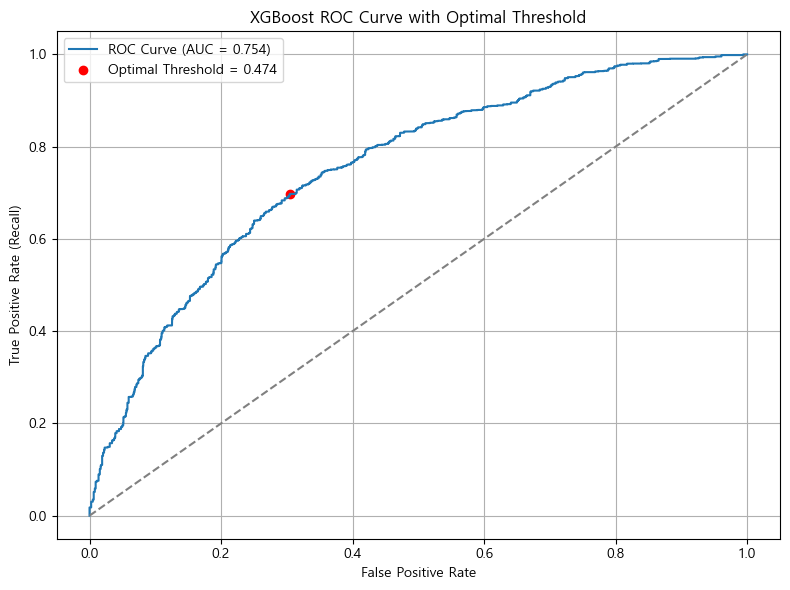

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba, sample_weight=w_test):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('XGBoost ROC Curve with Optimal Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

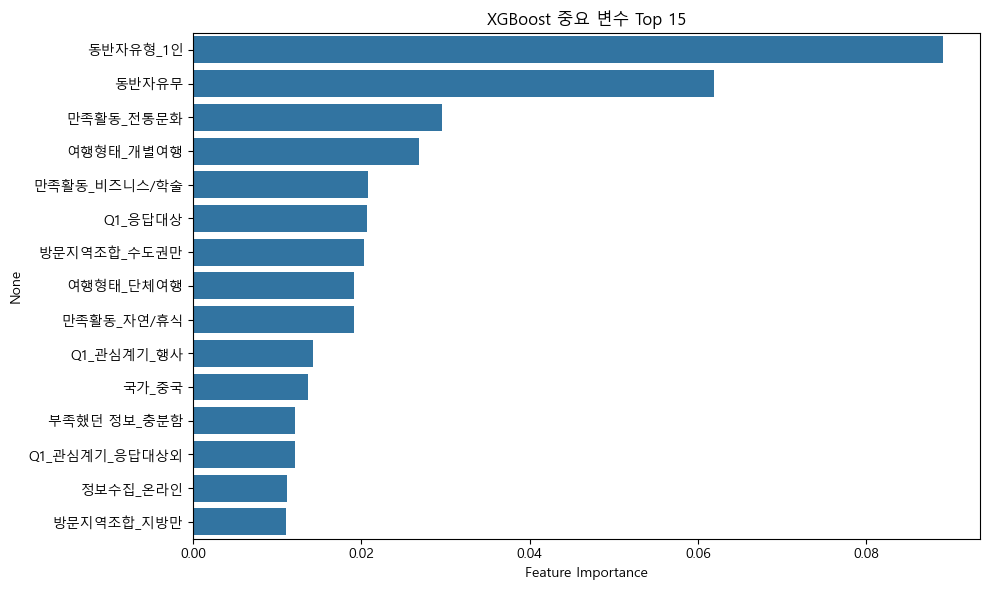

In [14]:
importances = pd.Series(model.feature_importances_, index=X.columns)
top_n = 15
top_features = importances.sort_values(ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title(f'XGBoost Ï§ëÏöî Î≥ÄÏàò Top {top_n}')
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

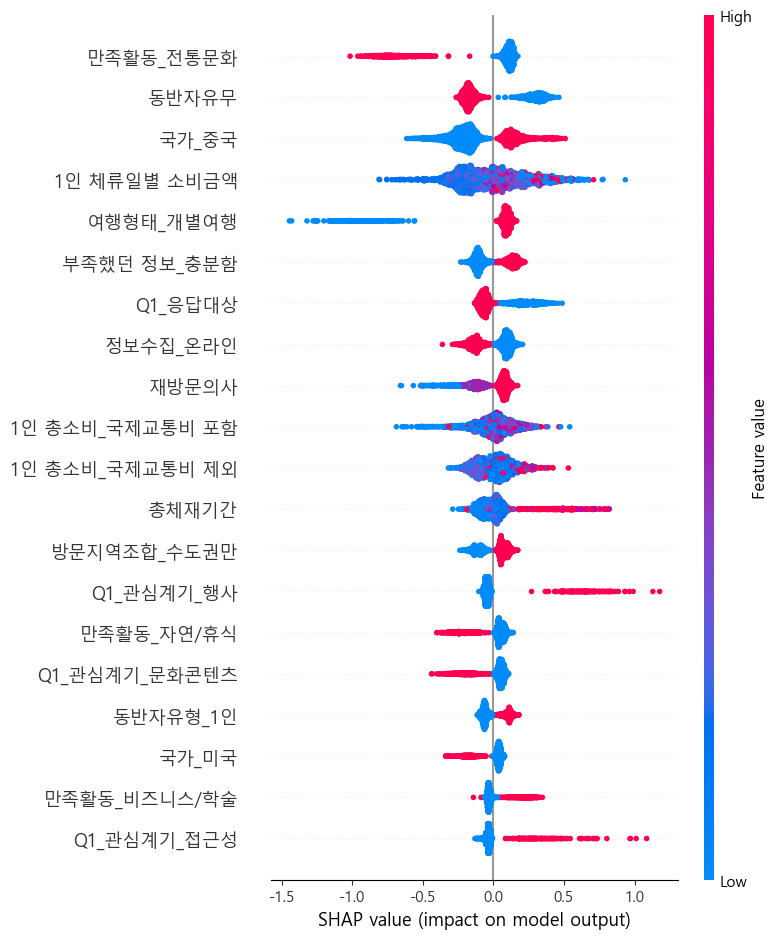

In [15]:
explainer = shap.Explainer(model)

# test ÏÑ∏Ìä∏Ïóê ÎåÄÌïú SHAP Í∞í Í≥ÑÏÇ∞
shap_values = explainer(X_test)


shap.summary_plot(shap_values, X_test, plot_type="dot")

In [16]:
import pandas as pd
import numpy as np
import shap

# 2. SHAP Í∞íÏùÑ numpy Î∞∞Ïó¥Î°ú Ï∂îÏ∂ú
shap_array = shap_values.values  # (n_samples, n_features)
shap_df = pd.DataFrame(shap_array, columns=X_test.columns)

# 3. ÌÜµÍ≥Ñ ÏöîÏïΩ
summary = pd.DataFrame({
    'feature': X_test.columns,
    'mean_abs_shap': np.abs(shap_array).mean(axis=0),
    'mean_shap': shap_array.mean(axis=0),
    'std_shap': shap_array.std(axis=0),
    'positive_ratio': (shap_array > 0).mean(axis=0)
})

# 4. Î∞©Ìñ•ÏÑ± Î∂ÑÎ•ò
summary['directionality'] = np.where(summary['positive_ratio'] > 0.9, 'strong_positive',
                            np.where(summary['positive_ratio'] < 0.1, 'strong_negative', 'neutral'))

# 5. ÏòÅÌñ•Î†• ÏÉÅÏúÑ Î≥ÄÏàò ÌïÑÌÑ∞ÎßÅ
threshold = summary['mean_abs_shap'].quantile(0.8)
top_influential = summary[summary['mean_abs_shap'] > threshold]

# 6. Ïù¥ÏßÑ Î≥ÄÏàòÎßå ÌïÑÌÑ∞ÎßÅ (0/1Îßå Ï°¥Ïû¨ÌïòÎäî Î≥ÄÏàò)
binary_cols = [col for col in X_test.columns if set(X_test[col].dropna().unique()).issubset({0, 1})]
summary_binary = top_influential[top_influential['feature'].isin(binary_cols)]

# 7. Ï∂úÎ†•
print("üéØ SHAP Í∏∞Î∞ò Ï†ïÏ±Ö Í∞úÏûÖ Í∞ÄÎä• ÌõÑÎ≥¥ Î≥ÄÏàò (0/1 Î≥ÄÏàò Ï§ë ÏòÅÌñ•Î†• ÏÉÅÏúÑ + Î∞©Ìñ•ÏÑ± Î™ÖÌôïÌïú Í≤É):")
summary_binary[['feature', 'mean_abs_shap', 'mean_shap', 'directionality']].sort_values('mean_abs_shap', ascending=False).head(15)


üéØ SHAP Í∏∞Î∞ò Ï†ïÏ±Ö Í∞úÏûÖ Í∞ÄÎä• ÌõÑÎ≥¥ Î≥ÄÏàò (0/1 Î≥ÄÏàò Ï§ë ÏòÅÌñ•Î†• ÏÉÅÏúÑ + Î∞©Ìñ•ÏÑ± Î™ÖÌôïÌïú Í≤É):


feature  mean_abs_shap  mean_shap   directionality
60      ÎßåÏ°±ÌôúÎèô_Ï†ÑÌÜµÎ¨∏Ìôî       0.228917  -0.051797          neutral
44          ÎèôÎ∞òÏûêÏú†Î¨¥       0.217283  -0.007582          neutral
91          Íµ≠Í∞Ä_Ï§ëÍµ≠       0.205104  -0.108184          neutral
0       Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ       0.177410  -0.007948  strong_positive
43    Î∂ÄÏ°±ÌñàÎçò Ï†ïÎ≥¥_Ï∂©Î∂ÑÌï®       0.117882  -0.009831          neutral
3         Q1_ÏùëÎãµÎåÄÏÉÅ       0.117396   0.023280          neutral
34       Ï†ïÎ≥¥ÏàòÏßë_Ïò®ÎùºÏù∏       0.110964   0.001577          neutral
63    Î∞©Î¨∏ÏßÄÏó≠Ï°∞Ìï©_ÏàòÎèÑÍ∂åÎßå       0.088521   0.006734          neutral
10     Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÌñâÏÇ¨       0.085245   0.001790  strong_negative
59     ÎßåÏ°±ÌôúÎèô_ÏûêÏó∞/Ìú¥Ïãù       0.081876   0.012972          neutral
6   Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Î¨∏ÌôîÏΩòÌÖêÏ∏†       0.077987   0.013155          neutral
45       ÎèôÎ∞òÏûêÏú†Ìòï_1Ïù∏       0.075287  -0.003503          neutral
84          Íµ≠Í∞Ä_ÎØ∏Íµ≠       0.063188   0.002671          neutral
55   ÎßåÏ°±ÌôúÎèô_ÎπÑÏ¶àÎãàÏä§/ÌïôÏà†       0.057590   0.005056          neutral
8     Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Ï†ëÍ∑ºÏÑ±       0.055304  -0.013340  strong_negative

In [17]:
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []

for train_idx, test_idx in cv.split(X, y):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
    w_tr, w_te = weights.iloc[train_idx], weights.iloc[test_idx]

    model_cv = XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )

    model_cv.fit(X_tr, y_tr, sample_weight=w_tr)
    y_prob = model_cv.predict_proba(X_te)[:, 1]
    auc = roc_auc_score(y_te, y_prob, sample_weight=w_te)
    auc_scores.append(auc)

print("‚ñ∂ Cross-Validation AUC Scores:", auc_scores)
print("‚ñ∂ Mean AUC:", np.mean(auc_scores))
print("‚ñ∂ Std AUC :", np.std(auc_scores))

‚ñ∂ Cross-Validation AUC Scores: [0.7695200464038219, 0.757926676237779, 0.7662236281347683, 0.7851873887145149, 0.7556392500015204]
‚ñ∂ Mean AUC: 0.7668993978984809
‚ñ∂ Std AUC : 0.01047927226587123


### (2) Í∑∏Î¶¨Îìú ÏÑúÏπò Î™®Îç∏

| Îã®Í≥Ñ | ÌååÎùºÎØ∏ÌÑ∞                               | ÏÑ§Î™Ö          |
| -- | ---------------------------------- | ----------- |
| ‚ë†  | `max_depth`, `min_child_weight`    | Î™®Îç∏ Î≥µÏû°ÎèÑ Ï°∞Ï†à   |
| ‚ë°  | `subsample`, `colsample_bytree`    | Í≥ºÏ†ÅÌï© Î∞©ÏßÄ      |
| ‚ë¢  | `learning_rate`, `n_estimators`    | ÌïôÏäµ ÏÜçÎèÑ/ÌöüÏàò Ï°∞Ï†à |
| ‚ë£  | `gamma`, `reg_alpha`, `reg_lambda` | Í∑úÏ†ú Ï°∞Ï†à       |


In [18]:
# 1Îã®Í≥Ñ ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
param_grid_1 = {
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5]
}

# Í∏∞Î≥∏ Î™®Îç∏
xgb_clf = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=1,
    colsample_bytree=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search_1 = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_1,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_1.fit(X_train, y_train, sample_weight=w_train)

print("Best Parameters:", grid_search_1.best_params_)
print("Best AUC Score:", grid_search_1.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 3, 'min_child_weight': 1}
Best AUC Score: 0.7596854722023556


In [19]:
# 1Îã®Í≥Ñ Í≤∞Í≥º Î∞òÏòÅ
best_model_1 = grid_search_1.best_estimator_
best_max_depth        = best_model_1.get_params()['max_depth']
best_min_child_weight = best_model_1.get_params()['min_child_weight']

# 2Îã®Í≥Ñ ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
param_grid_2 = {
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# 1Îã®Í≥Ñ ÏµúÏ†ÅÍ∞íÏùÑ Í≥†Ï†ïÌïú Î™®Îç∏
xgb_clf_2 = XGBClassifier(
    max_depth=best_max_depth,
    min_child_weight=best_min_child_weight,
    learning_rate=0.1,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search_2 = GridSearchCV(
    estimator=xgb_clf_2,
    param_grid=param_grid_2,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_2.fit(X_train, y_train, sample_weight=w_train)

print("Best Parameters (2Îã®Í≥Ñ):", grid_search_2.best_params_)
print("Best AUC Score:", grid_search_2.best_score_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters (2Îã®Í≥Ñ): {'colsample_bytree': 0.8, 'subsample': 0.8}
Best AUC Score: 0.7657889428419878


In [20]:
# 2Îã®Í≥ÑÍπåÏßÄ Í≤∞Í≥º Î∞òÏòÅ
best_model_2 = grid_search_2.best_estimator_
best_max_depth        = best_model_2.get_params()['max_depth']
best_min_child_weight = best_model_2.get_params()['min_child_weight']
best_subsample        = best_model_2.get_params()['subsample']
best_colsample_bytree = best_model_2.get_params()['colsample_bytree']

# 3Îã®Í≥Ñ ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
param_grid_3 = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

# Ïù¥Ï†Ñ ÏµúÏ†ÅÍ∞íÏùÑ Í≥†Ï†ïÌïú Î™®Îç∏
xgb_clf_3 = XGBClassifier(
    max_depth=best_max_depth,
    min_child_weight=best_min_child_weight,
    subsample=best_subsample,
    colsample_bytree=best_colsample_bytree,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search_3 = GridSearchCV(
    estimator=xgb_clf_3,
    param_grid=param_grid_3,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_3.fit(X_train, y_train, sample_weight=w_train)

print("Best Parameters (3Îã®Í≥Ñ):", grid_search_3.best_params_)
print("Best AUC Score:", grid_search_3.best_score_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters (3Îã®Í≥Ñ): {'learning_rate': 0.1, 'n_estimators': 100}
Best AUC Score: 0.7657889428419878


In [21]:
# 3Îã®Í≥ÑÍπåÏßÄ Í≤∞Í≥º Î∞òÏòÅ
best_model_3 = grid_search_3.best_estimator_
best_max_depth        = best_model_3.get_params()['max_depth']
best_min_child_weight = best_model_3.get_params()['min_child_weight']
best_subsample        = best_model_3.get_params()['subsample']
best_colsample_bytree = best_model_3.get_params()['colsample_bytree']
best_learning_rate    = best_model_3.get_params()['learning_rate']
best_n_estimators     = best_model_3.get_params()['n_estimators']

# 4Îã®Í≥Ñ ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
param_grid_4 = {
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1.0],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

# Ïù¥Ï†Ñ ÏµúÏ†ÅÍ∞íÏùÑ Í≥†Ï†ïÌïú Î™®Îç∏
xgb_clf_4 = XGBClassifier(
    max_depth=best_max_depth,
    min_child_weight=best_min_child_weight,
    subsample=best_subsample,
    colsample_bytree=best_colsample_bytree,
    learning_rate=best_learning_rate,
    n_estimators=best_n_estimators,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search_4 = GridSearchCV(
    estimator=xgb_clf_4,
    param_grid=param_grid_4,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_4.fit(X_train, y_train, sample_weight=w_train)

print("Best Parameters (4Îã®Í≥Ñ):", grid_search_4.best_params_)
print("Best AUC Score:", grid_search_4.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters (4Îã®Í≥Ñ): {'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 0.5}
Best AUC Score: 0.7657992416718642


In [22]:
best_model = grid_search_4.best_estimator_

In [23]:
best_params_4 = grid_search_4.best_params_

best_max_depth        = best_model.get_params()['max_depth']
best_min_child_weight = best_model.get_params()['min_child_weight']
best_subsample        = best_model.get_params()['subsample']
best_colsample_bytree = best_model.get_params()['colsample_bytree']
best_learning_rate    = best_model.get_params()['learning_rate']
best_n_estimators     = best_model.get_params()['n_estimators']
best_gamma            = best_params_4.get('gamma', 0)
best_reg_alpha        = best_params_4.get('reg_alpha', 0)
best_reg_lambda       = best_params_4.get('reg_lambda', 1)

In [24]:
print("‚ñ∂ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞")
print(f"max_depth        = {best_max_depth}")
print(f"min_child_weight = {best_min_child_weight}")
print(f"subsample        = {best_subsample}")
print(f"colsample_bytree = {best_colsample_bytree}")
print(f"learning_rate    = {best_learning_rate}")
print(f"n_estimators     = {best_n_estimators}")
print(f"gamma            = {best_gamma}")
print(f"reg_alpha        = {best_reg_alpha}")
print(f"reg_lambda       = {best_reg_lambda}")

‚ñ∂ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞
max_depth        = 3
min_child_weight = 1
subsample        = 0.8
colsample_bytree = 0.8
learning_rate    = 0.1
n_estimators     = 100
gamma            = 0
reg_alpha        = 0.1
reg_lambda       = 0.5


In [25]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba, sample_weight=w_test)
youden_index = tpr - fpr
optimal_idx = youden_index.argmax()
optimal_threshold = thresholds[optimal_idx]

y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)

print(f"\n‚ñ∂ [XGBoost Í≤∞Í≥º: Threshold = {optimal_threshold:.3f}]")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"Precision    : {precision_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"Recall       : {recall_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"F1 Score     : {f1_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"ROC AUC      : {roc_auc_score(y_test, y_proba, sample_weight=w_test):.3f}")

print("\n‚ñ∂ [Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏]")
print(classification_report(y_test, y_pred_adjusted, sample_weight=w_test, digits=3))
print("\n‚ñ∂ [ÌòºÎèô ÌñâÎ†¨]")
print(confusion_matrix(y_test, y_pred_adjusted))


‚ñ∂ [XGBoost Í≤∞Í≥º: Threshold = 0.411]
Accuracy     : 0.693
Precision    : 0.666
Recall       : 0.782
F1 Score     : 0.720
ROC AUC      : 0.759

‚ñ∂ [Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏]
              precision    recall  f1-score   support

           0      0.731     0.602     0.660 890054.329999999
           1      0.666     0.782     0.720 904245.7800000005

    accuracy                          0.693 1794300.1099999994
   macro avg      0.699     0.692     0.690 1794300.1099999994
weighted avg      0.698     0.693     0.690 1794300.1099999994


‚ñ∂ [ÌòºÎèô ÌñâÎ†¨]
[[646 465]
 [231 760]]


ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò:
Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä
0    3702
1    3303
Name: count, dtype: int64

ÌÅ¥ÎûòÏä§Î≥Ñ ÎπÑÏú® (%):
Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä
0    52.85
1    47.15
Name: proportion, dtype: float64


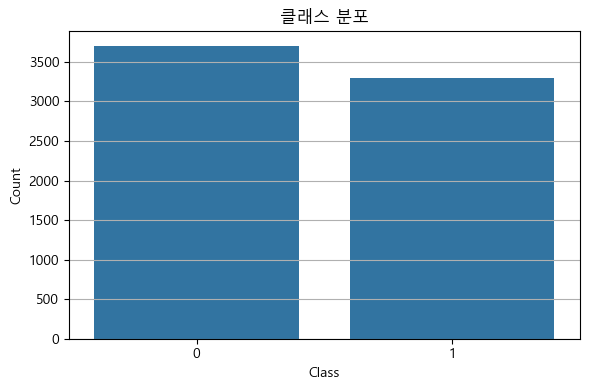

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ Í∞úÏàò
class_counts = y.value_counts()
class_percent = y.value_counts(normalize=True) * 100

print("ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò:")
print(class_counts)
print("\nÌÅ¥ÎûòÏä§Î≥Ñ ÎπÑÏú® (%):")
print(class_percent.round(2))

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values)
plt.title("ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

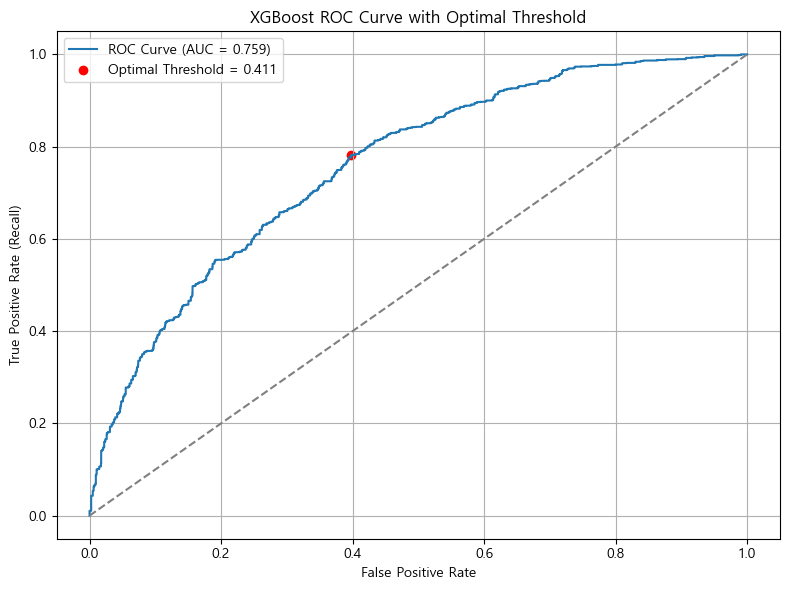

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba, sample_weight=w_test):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('XGBoost ROC Curve with Optimal Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

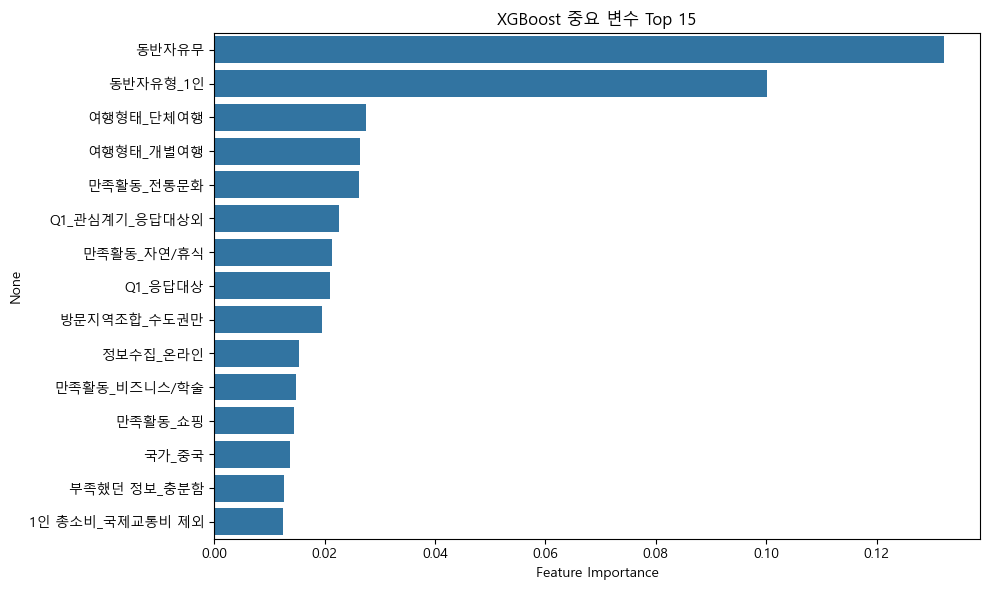

In [36]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_n = 15
top_features = importances.sort_values(ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title(f'XGBoost Ï§ëÏöî Î≥ÄÏàò Top {top_n}')
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

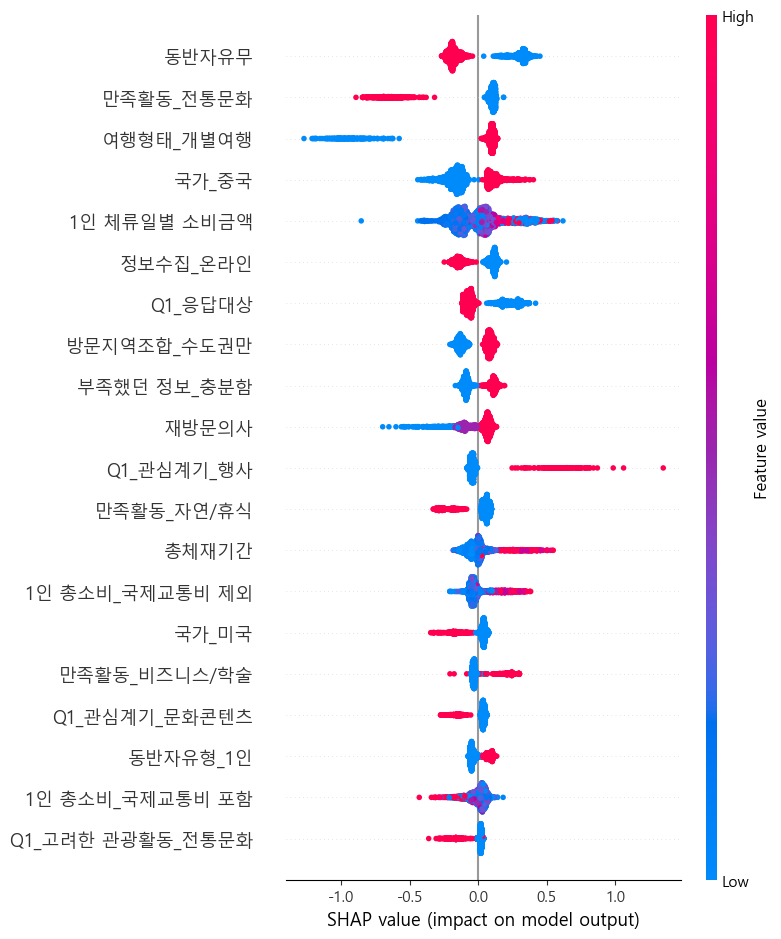

In [37]:
explainer = shap.Explainer(best_model)

# test ÏÑ∏Ìä∏Ïóê ÎåÄÌïú SHAP Í∞í Í≥ÑÏÇ∞
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="dot")

In [38]:
import pandas as pd
import numpy as np
import shap


# 2. SHAP Í∞íÏùÑ numpy Î∞∞Ïó¥Î°ú Ï∂îÏ∂ú
shap_array = shap_values.values  # (n_samples, n_features)
shap_df = pd.DataFrame(shap_array, columns=X_test.columns)

# 3. ÌÜµÍ≥Ñ ÏöîÏïΩ
summary = pd.DataFrame({
    'feature': X_test.columns,
    'mean_abs_shap': np.abs(shap_array).mean(axis=0),
    'mean_shap': shap_array.mean(axis=0),
    'std_shap': shap_array.std(axis=0),
    'positive_ratio': (shap_array > 0).mean(axis=0)
})

# 4. Î∞©Ìñ•ÏÑ± Î∂ÑÎ•ò
summary['directionality'] = np.where(summary['positive_ratio'] > 0.9, 'strong_positive',
                            np.where(summary['positive_ratio'] < 0.1, 'strong_negative', 'neutral'))

# 5. ÏòÅÌñ•Î†• ÏÉÅÏúÑ Î≥ÄÏàò ÌïÑÌÑ∞ÎßÅ
threshold = summary['mean_abs_shap'].quantile(0.8)
top_influential = summary[summary['mean_abs_shap'] > threshold]

# 6. Ïù¥ÏßÑ Î≥ÄÏàòÎßå ÌïÑÌÑ∞ÎßÅ (0/1Îßå Ï°¥Ïû¨ÌïòÎäî Î≥ÄÏàò)
binary_cols = [col for col in X_test.columns if set(X_test[col].dropna().unique()).issubset({0, 1})]
summary_binary = top_influential[top_influential['feature'].isin(binary_cols)]

# 7. Ï∂úÎ†•
print("üéØ SHAP Í∏∞Î∞ò Ï†ïÏ±Ö Í∞úÏûÖ Í∞ÄÎä• ÌõÑÎ≥¥ Î≥ÄÏàò (0/1 Î≥ÄÏàò Ï§ë ÏòÅÌñ•Î†• ÏÉÅÏúÑ + Î∞©Ìñ•ÏÑ± Î™ÖÌôïÌïú Í≤É):")
summary_binary[['feature', 'mean_abs_shap', 'mean_shap', 'directionality']].sort_values('mean_abs_shap', ascending=False)


üéØ SHAP Í∏∞Î∞ò Ï†ïÏ±Ö Í∞úÏûÖ Í∞ÄÎä• ÌõÑÎ≥¥ Î≥ÄÏàò (0/1 Î≥ÄÏàò Ï§ë ÏòÅÌñ•Î†• ÏÉÅÏúÑ + Î∞©Ìñ•ÏÑ± Î™ÖÌôïÌïú Í≤É):


feature  mean_abs_shap  mean_shap   directionality
44             ÎèôÎ∞òÏûêÏú†Î¨¥       0.222630  -0.012352          neutral
60         ÎßåÏ°±ÌôúÎèô_Ï†ÑÌÜµÎ¨∏Ìôî       0.215518  -0.048048          neutral
0          Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ       0.180009  -0.004239  strong_positive
91             Íµ≠Í∞Ä_Ï§ëÍµ≠       0.155381  -0.082856          neutral
34          Ï†ïÎ≥¥ÏàòÏßë_Ïò®ÎùºÏù∏       0.121649   0.006314          neutral
3            Q1_ÏùëÎãµÎåÄÏÉÅ       0.113139   0.020705          neutral
63       Î∞©Î¨∏ÏßÄÏó≠Ï°∞Ìï©_ÏàòÎèÑÍ∂åÎßå       0.099793   0.006255          neutral
43       Î∂ÄÏ°±ÌñàÎçò Ï†ïÎ≥¥_Ï∂©Î∂ÑÌï®       0.099246  -0.009017          neutral
10        Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÌñâÏÇ¨       0.082767   0.000655  strong_negative
59        ÎßåÏ°±ÌôúÎèô_ÏûêÏó∞/Ìú¥Ïãù       0.080172   0.012872          neutral
84             Íµ≠Í∞Ä_ÎØ∏Íµ≠       0.060008   0.002920          neutral
55      ÎßåÏ°±ÌôúÎèô_ÎπÑÏ¶àÎãàÏä§/ÌïôÏà†       0.058951   0.002331          neutral
6      Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Î¨∏ÌôîÏΩòÌÖêÏ∏†       0.057249   0.007009          neutral
45          ÎèôÎ∞òÏûêÏú†Ìòï_1Ïù∏       0.054994  -0.000048          neutral
20  Q1_Í≥†Î†§Ìïú Í¥ÄÍ¥ëÌôúÎèô_Ï†ÑÌÜµÎ¨∏Ìôî       0.042071  -0.009134          neutral
8        Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Ï†ëÍ∑ºÏÑ±       0.041960  -0.010580  strong_negative
35           Ï†ïÎ≥¥ÏàòÏßë_ÏßÄÏù∏       0.037199   0.001708          neutral
82          Íµ≠Í∞Ä_ÎßêÎ†àÏù¥ÏãúÏïÑ       0.033688   0.015318  strong_negative
75         ÏáºÌïëÏû•ÏÜå_Ï†ÑÌÜµÏãúÏû•       0.032714  -0.001406          neutral

In [31]:
# 4Îã®Í≥Ñ ÏµúÏ¢Ö Î™®Îç∏ÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
final_model = XGBClassifier(**best_model.get_params())

In [32]:
# StratifiedKFold Ï†ïÏùò
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# AUC Í∏∞Ï§ÄÏúºÎ°ú ÍµêÏ∞®Í≤ÄÏ¶ù ÏàòÌñâ
cv_scores = cross_val_score(
    final_model,
    X,
    y,
    cv=cv,
    scoring='roc_auc'
)

# Í≤∞Í≥º Ï∂úÎ†•
print("‚ñ∂ Cross-Validation AUC Scores:", cv_scores)
print("‚ñ∂ Mean AUC:", np.mean(cv_scores))
print("‚ñ∂ Std AUC:", np.std(cv_scores))

‚ñ∂ Cross-Validation AUC Scores: [0.75530201 0.76918374 0.75458151 0.77489062 0.769291  ]
‚ñ∂ Mean AUC: 0.7646497766937292
‚ñ∂ Std AUC: 0.008194187109150505


### Cluster2 ÏµúÏ¢Ö Î™®Îç∏: Í∑∏Î¶¨Îìú ÏÑúÏπò Î™®Îç∏

### (3) ÏãúÎÆ¨Î†àÏù¥ÏÖò - ÌÉÄÍπÉÏóê ÎåÄÌï¥

#### Í∞ÄÏ§ëÏπò Î∞òÏòÅ X ver

In [52]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Í∑∏Î¶¨ÎìúÏÑúÏπò ÏµúÏ†Å Î™®Îç∏ Í∏∞Î∞ò ÏãúÎÆ¨Î†àÏù¥ÏÖò ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
target_mask = (
    (y_test == 0) &
    (X_test['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ'] == False) &
    (X_test['ÎßåÏ°±ÌôúÎèô_ÏáºÌïë'] == False) &
    (X_test['Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÌñâÏÇ¨'] == False) &
    (X_test['Ï†ïÎ≥¥ÏàòÏßë_Ïò®ÎùºÏù∏'] == False)
)
X_target_gs = X_test[target_mask].copy()
proba_before_gs = best_model.predict_proba(X_target_gs)[:, 1]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Îã®Ïùº ÏÑ†ÌÉùÌòï Î≥ÄÏàò Í∑∏Î£π Ï†ïÏùò ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
travel_cols = ['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ', 'Ïó¨ÌñâÌòïÌÉú_ÏóêÏñ¥ÌÖî', 'Ïó¨ÌñâÌòïÌÉú_Îã®Ï≤¥Ïó¨Ìñâ']
interest_cols = [col for col in X_test.columns if col.startswith('Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_') and col != 'Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÏùëÎãµÎåÄÏÉÅ']
activity_cols = [col for col in X_test.columns if col.startswith('Q1_Í≥†Î†§Ìïú Í¥ÄÍ¥ëÌôúÎèô_')]
good_cols = [col for col in X_test.columns if col.startswith('ÎßåÏ°±ÌôúÎèô_')]
bujok_cols = [col for col in X_test.columns if col.startswith('Î∂ÄÏ°±ÌñàÎçò Ï†ïÎ≥¥_')]
information_cols = [col for col in X_test.columns if col.startswith('Ï†ïÎ≥¥ÏàòÏßë_')]
visit_cols = [col for col in X_test.columns if col.startswith('Î∞©Î¨∏ÏßÄÏó≠_')]

# Î≥ÄÏàò Í∞úÏûÖ ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©
X_sim_gs = X_target_gs.copy()

X_sim_gs[travel_cols] = False
X_sim_gs['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ'] = True

X_sim_gs[good_cols] = False
X_sim_gs['ÎßåÏ°±ÌôúÎèô_ÏáºÌïë'] = True

X_sim_gs[interest_cols] = False
X_sim_gs['Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÌñâÏÇ¨'] = True

X_sim_gs[information_cols] = False
X_sim_gs['Ï†ïÎ≥¥ÏàòÏßë_Ïò®ÎùºÏù∏'] = True

# Î≥ÄÌôî ÌõÑ ÏòàÏ∏° Î∞è ÏöîÏïΩ
proba_after_gs = best_model.predict_proba(X_sim_gs)[:, 1]
delta_gs = proba_after_gs - proba_before_gs

# Ï†ÑÏ≤¥ test ÏÑ∏Ìä∏ Í∏∞Ï§Ä best_modelÏö© threshold Í≥ÑÏÇ∞
y_proba_gs = best_model.predict_proba(X_test)[:, 1]
fpr_gs, tpr_gs, thresholds_gs = roc_curve(y_test, y_proba_gs, sample_weight=w_test)
optimal_idx_gs = (tpr_gs - fpr_gs).argmax()
optimal_threshold_gs = thresholds_gs[optimal_idx_gs]

summary_best = pd.DataFrame({'Before': proba_before_gs, 'After': proba_after_gs, 'Change': delta_gs})
summary_best['Lifted'] = (summary_best['After'] >= optimal_threshold_gs).astype(int)

# Î∂ÑÏÑù ÏöîÏïΩ Ï∂úÎ†•
print("\n[Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ Í∏∞Î∞ò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º ÏöîÏïΩ]")
print(f"‚ñ∂ ÌÉÄÍπÉ Ïàò               : {len(summary_best)}")
print(f"‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî        : {delta_gs.mean():.4f}")
print(f"‚ñ∂ Ïû¨Î∞©Î¨∏ ÌôïÎ•† ÏÉÅÏäπÏûê Ïàò : {summary_best['Lifted'].sum()}Î™Ö")
print(f"‚ñ∂ ÏÉÅÏäπ ÎπÑÏú®             : {summary_best['Lifted'].mean() * 100:.2f}%")
print(f"‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî             : {delta_gs.max():.4f}")
print(f"‚ñ∂ ÏµúÏÜå Î≥ÄÌôî             : {delta_gs.min():.4f}")



[Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ Í∏∞Î∞ò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º ÏöîÏïΩ]
‚ñ∂ ÌÉÄÍπÉ Ïàò               : 103
‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî        : 0.4179
‚ñ∂ Ïû¨Î∞©Î¨∏ ÌôïÎ•† ÏÉÅÏäπÏûê Ïàò : 94Î™Ö
‚ñ∂ ÏÉÅÏäπ ÎπÑÏú®             : 91.26%
‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî             : 0.6298
‚ñ∂ ÏµúÏÜå Î≥ÄÌôî             : 0.1009


#### Í∞ÄÏ§ëÏπò Î∞òÏòÅ O ver

In [53]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï°∞Í±¥Î∂Ä ÌÉÄÍπÉ Ï†ïÏùò ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
target_mask = (
    (y_test == 0) &
    (X_test['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ'] == False) &
    (X_test['ÎßåÏ°±ÌôúÎèô_ÏáºÌïë'] == False) &
    (X_test['Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÌñâÏÇ¨'] == False) &
    (X_test['Ï†ïÎ≥¥ÏàòÏßë_Ïò®ÎùºÏù∏'] == False)
)
X_target_gs = X_test[target_mask].copy()
weights_target_gs = w_test[target_mask].copy()  # üéØ Í∞ÄÏ§ëÏπò Ï∂îÏ∂ú

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Îã®Ïùº ÏÑ†ÌÉùÌòï Î≥ÄÏàò Í∑∏Î£π Ï†ïÏùò ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
travel_cols = ['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ', 'Ïó¨ÌñâÌòïÌÉú_ÏóêÏñ¥ÌÖî', 'Ïó¨ÌñâÌòïÌÉú_Îã®Ï≤¥Ïó¨Ìñâ']
interest_cols = [col for col in X_test.columns if col.startswith('Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_') and col != 'Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÏùëÎãµÎåÄÏÉÅ']
activity_cols = [col for col in X_test.columns if col.startswith('Q1_Í≥†Î†§Ìïú Í¥ÄÍ¥ëÌôúÎèô_')]
good_cols = [col for col in X_test.columns if col.startswith('ÎßåÏ°±ÌôúÎèô_')]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Î≥ÄÏàò Í∞úÏûÖ ÏãúÎÇòÎ¶¨Ïò§ Ï†ÅÏö© ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
X_sim_gs = X_target_gs.copy()

X_sim_gs[travel_cols] = False
X_sim_gs['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ'] = True

X_sim_gs[good_cols] = False
X_sim_gs['ÎßåÏ°±ÌôúÎèô_ÏáºÌïë'] = True

X_sim_gs[interest_cols] = False
X_sim_gs['Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÌñâÏÇ¨'] = True

X_sim_gs[information_cols] = False
X_sim_gs['Ï†ïÎ≥¥ÏàòÏßë_Ïò®ÎùºÏù∏'] = True

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏòàÏ∏° Î∞è Î≥ÄÌôîÎüâ Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
proba_before_gs = best_model.predict_proba(X_target_gs)[:, 1]
proba_after_gs = best_model.predict_proba(X_sim_gs)[:, 1]
delta_gs = proba_after_gs - proba_before_gs

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ threshold Í≥ÑÏÇ∞ (Ï†ÑÏ≤¥ test Í∏∞Ï§Ä) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
y_proba_gs = best_model.predict_proba(X_test)[:, 1]
fpr_gs, tpr_gs, thresholds_gs = roc_curve(y_test, y_proba_gs, sample_weight=w_test)
optimal_idx_gs = (tpr_gs - fpr_gs).argmax()
optimal_threshold_gs = thresholds_gs[optimal_idx_gs]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Í≤∞Í≥º ÏöîÏïΩ ÌÖåÏù¥Î∏î ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import pandas as pd
import numpy as np

summary_gs = pd.DataFrame({
    'Before': proba_before_gs,
    'After': proba_after_gs,
    'Change': delta_gs
})
summary_gs['Lifted'] = (summary_gs['After'] >= optimal_threshold_gs).astype(int)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Í∞ÄÏ§ë ÌÜµÍ≥Ñ Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
weights_array_gs = weights_target_gs.to_numpy()
assert len(weights_array_gs) == len(delta_gs), "Í∞ÄÏ§ëÏπòÏôÄ delta Í∏∏Ïù¥ Î∂àÏùºÏπò"

# ÌèâÍ∑† Î≥ÄÌôîÎüâ
weighted_mean_delta_gs = np.average(delta_gs, weights=weights_array_gs)

# ÏÉÅÏäπÏûê Í∞ÄÏ§ëÏπò Ìï©
lifted_weights_gs = weights_array_gs[summary_gs['Lifted'].to_numpy() == 1]
weighted_lifted_sum_gs = lifted_weights_gs.sum()

# Ï†ÑÏ≤¥ Í∞ÄÏ§ë ÌÉÄÍπÉ Ïàò
total_weight_gs = weights_array_gs.sum()

# ÏÉÅÏäπ ÎπÑÏú®
weighted_lifted_ratio_gs = (weighted_lifted_sum_gs / total_weight_gs) * 100

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Î≥ÄÌôîÎüâ ÏµúÎåìÍ∞í/ÏµúÏÜüÍ∞í ÏùëÎãµÏûê ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
top_lift_idx = np.argmax(delta_gs)
bottom_lift_idx = np.argmin(delta_gs)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê Ï§ë Ï°∞Í±¥Î∂Ä ÌÉÄÍπÉ ÎπÑÏ§ë Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
non_repeat_mask_all = (y_test == 0)
total_nonrepeat_weight = w_test[non_repeat_mask_all].sum()
target_weight_ratio_gs = (total_weight_gs / total_nonrepeat_weight) * 100

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏµúÏ¢Ö Ï∂úÎ†• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("\nüìò [Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ Í∏∞Î∞ò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º ÏöîÏïΩ - Í∞ÄÏ§ëÏπò Î∞òÏòÅ]")
print(f"‚ñ∂ Í∞ÄÏ§ë ÌÉÄÍπÉ Ïàò             : {total_weight_gs:.0f}Î™Ö")
print(f"‚ñ∂ Ï°∞Í±¥Î∂Ä ÌÉÄÍπÉ ÎπÑÏ§ë (Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê Ï§ë) : {target_weight_ratio_gs:.2f}%")
print(f"‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî (Í∞ÄÏ§ë)    : {weighted_mean_delta_gs:.4f}")
print(f"‚ñ∂ Ïû¨Î∞©Î¨∏ ÏÉÅÏäπÏûê Ïàò (Í∞ÄÏ§ë)  : {weighted_lifted_sum_gs:.0f}Î™Ö")
print(f"‚ñ∂ ÏÉÅÏäπ ÎπÑÏú® (Í∞ÄÏ§ë)         : {weighted_lifted_ratio_gs:.2f}%")
print(f"‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî                : {delta_gs.max():.4f}")
print(f"‚ñ∂ ÏµúÏÜå Î≥ÄÌôî                : {delta_gs.min():.4f}")
print(f"‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÎåìÍ∞í ÏùëÎãµÏûê Before/After: {proba_before_gs[top_lift_idx]:.4f} ‚Üí {proba_after_gs[top_lift_idx]:.4f}")
print(f"‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÏÜüÍ∞í ÏùëÎãµÏûê Before/After: {proba_before_gs[bottom_lift_idx]:.4f} ‚Üí {proba_after_gs[bottom_lift_idx]:.4f}")



üìò [Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ Í∏∞Î∞ò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º ÏöîÏïΩ - Í∞ÄÏ§ëÏπò Î∞òÏòÅ]
‚ñ∂ Í∞ÄÏ§ë ÌÉÄÍπÉ Ïàò             : 103746Î™Ö
‚ñ∂ Ï°∞Í±¥Î∂Ä ÌÉÄÍπÉ ÎπÑÏ§ë (Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê Ï§ë) : 11.66%
‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî (Í∞ÄÏ§ë)    : 0.4058
‚ñ∂ Ïû¨Î∞©Î¨∏ ÏÉÅÏäπÏûê Ïàò (Í∞ÄÏ§ë)  : 88759Î™Ö
‚ñ∂ ÏÉÅÏäπ ÎπÑÏú® (Í∞ÄÏ§ë)         : 85.55%
‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî                : 0.6298
‚ñ∂ ÏµúÏÜå Î≥ÄÌôî                : 0.1009
‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÎåìÍ∞í ÏùëÎãµÏûê Before/After: 0.0834 ‚Üí 0.7132
‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÏÜüÍ∞í ÏùëÎãµÏûê Before/After: 0.2396 ‚Üí 0.3405


In [54]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏ ÌôïÎ•† Ï¶ùÍ∞ÄÎüâ Í≥ÑÏÇ∞ (Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ Í∏∞Ï§Ä) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
overall_delta_gs = (target_weight_ratio_gs / 100) * weighted_mean_delta_gs

print("\nüìò [Ï†ÑÏ≤¥ Í¥ÄÏ†êÏóêÏÑúÏùò Ïû¨Î∞©Î¨∏ ÌôïÎ•† ÏÉÅÏäπ Ìö®Í≥º - Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ Í∏∞Ï§Ä]")
print(f"‚ñ∂ Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê Ï§ë ÌÉÄÍπÉÏù¥ Ï∞®ÏßÄÌïòÎäî ÎπÑÏ§ë       : {target_weight_ratio_gs:.2f}%")
print(f"‚ñ∂ Ìï¥Îãπ ÌÉÄÍπÉÏùò ÌèâÍ∑† Ïû¨Î∞©Î¨∏ ÌôïÎ•† Î≥ÄÌôîÎüâ (Í∞ÄÏ§ë)     : {weighted_mean_delta_gs:.4f}")
print(f"‚ñ∂ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏ ÌôïÎ•† Ï¶ùÍ∞Ä Í∏∞Ïó¨ (ÌÉÄÍπÉ ÎπÑÏ§ë √ó Î≥ÄÌôîÎüâ) : {overall_delta_gs:.4f}")



üìò [Ï†ÑÏ≤¥ Í¥ÄÏ†êÏóêÏÑúÏùò Ïû¨Î∞©Î¨∏ ÌôïÎ•† ÏÉÅÏäπ Ìö®Í≥º - Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ Í∏∞Ï§Ä]
‚ñ∂ Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê Ï§ë ÌÉÄÍπÉÏù¥ Ï∞®ÏßÄÌïòÎäî ÎπÑÏ§ë       : 11.66%
‚ñ∂ Ìï¥Îãπ ÌÉÄÍπÉÏùò ÌèâÍ∑† Ïû¨Î∞©Î¨∏ ÌôïÎ•† Î≥ÄÌôîÎüâ (Í∞ÄÏ§ë)     : 0.4058
‚ñ∂ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏ ÌôïÎ•† Ï¶ùÍ∞Ä Í∏∞Ïó¨ (ÌÉÄÍπÉ ÎπÑÏ§ë √ó Î≥ÄÌôîÎüâ) : 0.0473


### (4) ÏãúÎÆ¨Î†àÏù¥ÏÖò - Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Í∞ùÏóê ÎåÄÌï¥

#### Í∞ÄÏ§ëÏπò Î∞òÏòÅ X ver

In [55]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏X ÎåÄÏÉÅ: Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# ÎåÄÏÉÅ Ïû¨ÏÇ¨Ïö©
X_non_repeat_gs = X_test[y_test == 0].copy()
proba_before_gs_all = best_model.predict_proba(X_non_repeat_gs)[:, 1]

# Î≥ÄÏàò Í∞úÏûÖ
X_sim_gs_all = X_non_repeat_gs.copy()

X_sim_gs_all[travel_cols] = False
X_sim_gs_all['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ'] = True

X_sim_gs_all[good_cols] = False
X_sim_gs_all['ÎßåÏ°±ÌôúÎèô_ÏáºÌïë'] = True

X_sim_gs_all[interest_cols] = False
X_sim_gs_all['Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÌñâÏÇ¨'] = True

X_sim_gs_all[information_cols] = False
X_sim_gs_all['Ï†ïÎ≥¥ÏàòÏßë_Ïò®ÎùºÏù∏'] = True

# ÏòàÏ∏° Î∞è Î≥ÄÌôîÎüâ
proba_after_gs_all = best_model.predict_proba(X_sim_gs_all)[:, 1]
delta_gs_all = proba_after_gs_all - proba_before_gs_all

# best_modelÏö© threshold Ïû¨Í≥ÑÏÇ∞ (Ï†ÑÏ≤¥ test Í∏∞Ï§Ä)
y_proba_gs = best_model.predict_proba(X_test)[:, 1]
fpr_gs, tpr_gs, thresholds_gs = roc_curve(y_test, y_proba_gs, sample_weight=w_test)
optimal_idx_gs = (tpr_gs - fpr_gs).argmax()
optimal_threshold_gs = thresholds_gs[optimal_idx_gs]

summary_gs_all = pd.DataFrame({
    'Before': proba_before_gs_all,
    'After': proba_after_gs_all,
    'Change': delta_gs_all
})
summary_gs_all['Lifted'] = (summary_gs_all['After'] >= optimal_threshold_gs).astype(int)

# Í≤∞Í≥º ÏöîÏïΩ
print("\nüìò [Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò - Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏]")
print(f"‚ñ∂ Ï†ÑÏ≤¥ ÎåÄÏÉÅ Ïàò           : {len(summary_gs_all)}")
print(f"‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî         : {delta_gs_all.mean():.4f}")
print(f"‚ñ∂ Ïû¨Î∞©Î¨∏ Í∞ÄÎä•ÏÑ± ÏÉÅÏäπÏûê Ïàò : {summary_gs_all['Lifted'].sum()}Î™Ö")
print(f"‚ñ∂ ÏÉÅÏäπ ÎπÑÏú®               : {summary_gs_all['Lifted'].mean()*100:.2f}%")
print(f"‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî               : {delta_gs_all.max():.4f}")
print(f"‚ñ∂ ÏµúÏÜå Î≥ÄÌôî               : {delta_gs_all.min():.4f}")



üìò [Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò - Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏]
‚ñ∂ Ï†ÑÏ≤¥ ÎåÄÏÉÅ Ïàò           : 1111
‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî         : 0.2222
‚ñ∂ Ïû¨Î∞©Î¨∏ Í∞ÄÎä•ÏÑ± ÏÉÅÏäπÏûê Ïàò : 1038Î™Ö
‚ñ∂ ÏÉÅÏäπ ÎπÑÏú®               : 93.43%
‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî               : 0.6747
‚ñ∂ ÏµúÏÜå Î≥ÄÌôî               : -0.1565


#### Í∞ÄÏ§ëÏπò Î∞òÏòÅ O ver

In [56]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏X ÎåÄÏÉÅ: Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# ÎåÄÏÉÅ ÌïÑÌÑ∞
non_repeat_mask_gs = (y_test == 0)
X_non_repeat_gs = X_test[non_repeat_mask_gs].copy()
weights_non_repeat_gs = w_test[non_repeat_mask_gs].copy()

# ÏòàÏ∏° Ï†Ñ ÌôïÎ•†
proba_before_gs_all = best_model.predict_proba(X_non_repeat_gs)[:, 1]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Î≥ÄÏàò Í∞úÏûÖ ÏãúÎÇòÎ¶¨Ïò§ Ï†ÅÏö© ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
X_sim_gs_all = X_non_repeat_gs.copy()

X_sim_gs_all[travel_cols] = False
X_sim_gs_all['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ'] = True

X_sim_gs_all[good_cols] = False
X_sim_gs_all['ÎßåÏ°±ÌôúÎèô_ÏáºÌïë'] = True

X_sim_gs_all[interest_cols] = False
X_sim_gs_all['Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÌñâÏÇ¨'] = True

X_sim_gs_all[information_cols] = False
X_sim_gs_all['Ï†ïÎ≥¥ÏàòÏßë_Ïò®ÎùºÏù∏'] = True

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏòàÏ∏° Î∞è Î≥ÄÌôîÎüâ Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
proba_after_gs_all = best_model.predict_proba(X_sim_gs_all)[:, 1]
delta_gs_all = proba_after_gs_all - proba_before_gs_all

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ threshold Ïû¨Í≥ÑÏÇ∞ (Ï†ÑÏ≤¥ test Í∏∞Ï§Ä) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
y_proba_gs = best_model.predict_proba(X_test)[:, 1]
fpr_gs, tpr_gs, thresholds_gs = roc_curve(y_test, y_proba_gs, sample_weight=w_test)
optimal_idx_gs = (tpr_gs - fpr_gs).argmax()
optimal_threshold_gs = thresholds_gs[optimal_idx_gs]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Í≤∞Í≥º ÏöîÏïΩ ÌÖåÏù¥Î∏î ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import pandas as pd
import numpy as np

summary_gs_all = pd.DataFrame({
    'Before': proba_before_gs_all,
    'After': proba_after_gs_all,
    'Change': delta_gs_all
})
summary_gs_all['Lifted'] = (summary_gs_all['After'] >= optimal_threshold_gs).astype(int)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Í∞ÄÏ§ë ÌÜµÍ≥Ñ Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
weights_array_gs_all = weights_non_repeat_gs.to_numpy()

# ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî (Í∞ÄÏ§ë)
weighted_mean_delta_gs_all = np.average(delta_gs_all, weights=weights_array_gs_all)

# Ïû¨Î∞©Î¨∏ ÏÉÅÏäπÏûê Í∞ÄÏ§ëÏπò Ìï©
lifted_weights_gs_all = weights_array_gs_all[summary_gs_all['Lifted'].to_numpy() == 1]
weighted_lifted_sum_gs_all = lifted_weights_gs_all.sum()

# Ï†ÑÏ≤¥ Í∞ÄÏ§ë ÎåÄÏÉÅ Ïàò
total_weight_gs_all = weights_array_gs_all.sum()

# ÏÉÅÏäπ ÎπÑÏú® (Í∞ÄÏ§ë)
weighted_lifted_ratio_gs_all = (weighted_lifted_sum_gs_all / total_weight_gs_all) * 100

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Î≥ÄÌôîÎüâ ÏµúÎåìÍ∞í/ÏµúÏÜüÍ∞í ÏùëÎãµÏûê ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
top_idx_gs_all = np.argmax(delta_gs_all)
bottom_idx_gs_all = np.argmin(delta_gs_all)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏµúÏ¢Ö Ï∂úÎ†• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("\nüìò [Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò - Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏, Í∞ÄÏ§ëÏπò Î∞òÏòÅ]")
print(f"‚ñ∂ Í∞ÄÏ§ë ÎåÄÏÉÅ Ïàò             : {total_weight_gs_all:.0f}Î™Ö")
print(f"‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî (Í∞ÄÏ§ë)    : {weighted_mean_delta_gs_all:.4f}")
print(f"‚ñ∂ Ïû¨Î∞©Î¨∏ ÏÉÅÏäπÏûê Ïàò (Í∞ÄÏ§ë)  : {weighted_lifted_sum_gs_all:.0f}Î™Ö")
print(f"‚ñ∂ ÏÉÅÏäπ ÎπÑÏú® (Í∞ÄÏ§ë)         : {weighted_lifted_ratio_gs_all:.2f}%")
print(f"‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî                : {delta_gs_all.max():.4f}")
print(f"‚ñ∂ ÏµúÏÜå Î≥ÄÌôî                : {delta_gs_all.min():.4f}")
print(f"‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÎåìÍ∞í ÏùëÎãµÏûê Before/After: {proba_before_gs_all[top_idx_gs_all]:.4f} ‚Üí {proba_after_gs_all[top_idx_gs_all]:.4f}")
print(f"‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÏÜüÍ∞í ÏùëÎãµÏûê Before/After: {proba_before_gs_all[bottom_idx_gs_all]:.4f} ‚Üí {proba_after_gs_all[bottom_idx_gs_all]:.4f}")


üìò [Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò - Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏, Í∞ÄÏ§ëÏπò Î∞òÏòÅ]
‚ñ∂ Í∞ÄÏ§ë ÎåÄÏÉÅ Ïàò             : 890054Î™Ö
‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî (Í∞ÄÏ§ë)    : 0.2240
‚ñ∂ Ïû¨Î∞©Î¨∏ ÏÉÅÏäπÏûê Ïàò (Í∞ÄÏ§ë)  : 818970Î™Ö
‚ñ∂ ÏÉÅÏäπ ÎπÑÏú® (Í∞ÄÏ§ë)         : 92.01%
‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî                : 0.6747
‚ñ∂ ÏµúÏÜå Î≥ÄÌôî                : -0.1565
‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÎåìÍ∞í ÏùëÎãµÏûê Before/After: 0.1024 ‚Üí 0.7771
‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÏÜüÍ∞í ÏùëÎãµÏûê Before/After: 0.7849 ‚Üí 0.6284


In [57]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏ ÌôïÎ•† Ï¶ùÍ∞Ä Í∏∞Ïó¨ Í≥ÑÏÇ∞ (Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ Í∏∞Ï§Ä) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
overall_delta_gs_all = weighted_mean_delta_gs_all  # Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÎåÄÏÉÅÏù¥ÎØÄÎ°ú ÎπÑÏ§ë = 1

print("\nüìò [Ï†ÑÏ≤¥ Í¥ÄÏ†êÏóêÏÑúÏùò Ïû¨Î∞©Î¨∏ ÌôïÎ•† ÏÉÅÏäπ Ìö®Í≥º - Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÎåÄÏÉÅ, Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏]")
print(f"‚ñ∂ Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÌèâÍ∑† Ïû¨Î∞©Î¨∏ ÌôïÎ•† Î≥ÄÌôîÎüâ (Í∞ÄÏ§ë): {weighted_mean_delta_gs_all:.4f}")
print(f"‚ñ∂ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏ ÌôïÎ•† Ï¶ùÍ∞Ä Í∏∞Ïó¨                    : {overall_delta_gs_all:.4f}")



üìò [Ï†ÑÏ≤¥ Í¥ÄÏ†êÏóêÏÑúÏùò Ïû¨Î∞©Î¨∏ ÌôïÎ•† ÏÉÅÏäπ Ìö®Í≥º - Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÎåÄÏÉÅ, Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏]
‚ñ∂ Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÌèâÍ∑† Ïû¨Î∞©Î¨∏ ÌôïÎ•† Î≥ÄÌôîÎüâ (Í∞ÄÏ§ë): 0.2240
‚ñ∂ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏ ÌôïÎ•† Ï¶ùÍ∞Ä Í∏∞Ïó¨                    : 0.2240


# Cluster 3

## 1. Ï¢ÖÏÜçÎ≥ÄÏàò - Ïû¨Î∞©Î¨∏ Ïó¨Î∂Ä

### (1) Í∏∞Î≥∏ Î™®Îç∏

In [126]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Íµ≠Í∞Ä Î¶¨Ïä§Ìä∏
cluster3_countries = [
    'Íµ≠Í∞Ä_ÌôçÏΩ©', 'Íµ≠Í∞Ä_ÎåÄÎßå', 'Íµ≠Í∞Ä_Ïã±Í∞ÄÌè¨Î•¥', 
]

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Íµ≠Í∞Ä Î¶¨Ïä§Ìä∏ Ï§ë ÌïòÎÇòÎùºÎèÑ TrueÏù∏ ÌñâÎßå ÌïÑÌÑ∞ÎßÅ
cluster3_mask = df[cluster3_countries].any(axis=1)
df_c3 = df[cluster3_mask].copy()

In [128]:
# Ï¢ÖÏÜçÎ≥ÄÏàò
y = df_c3["Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä"]

# Í∞ÄÏ§ëÏπòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º ÏÑ§Î™ÖÎ≥ÄÏàòÏóêÏÑú Ï†úÏô∏
X = df_c3.drop(columns=["Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä", 'Í∞ÄÏ§ëÏπò', 'Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Í≤ΩÌóò', 'Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÏÉàÎ°úÏõÄ'])

# Î¨∏ÏûêÏó¥Ïù∏ Ïó¥ÏùÄ ÏÑ§Î™ÖÎ≥ÄÏàòÏóêÏÑú Ï†úÏô∏
X = X.select_dtypes(exclude=['object'])

weights = df_c3["Í∞ÄÏ§ëÏπò"]

In [129]:
# train / test ÏÑ∏Ìä∏ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, weights, test_size=0.3, stratify=y, random_state=42
)

# Í∏∞Î≥∏ Î™®Îç∏ ÌïôÏäµ
model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train, sample_weight=w_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [130]:
# ÏòàÏ∏°Í∞í ÏÉùÏÑ±
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [131]:
y_proba = model.predict_proba(X_test)[:, 1]

# ÏµúÏ†Å threshold Í≥ÑÏÇ∞
fpr, tpr, thresholds = roc_curve(y_test, y_proba, sample_weight=w_test)
youden_index = tpr - fpr
optimal_idx = youden_index.argmax()
optimal_threshold = thresholds[optimal_idx]

y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)

print(f"\n‚ñ∂ [XGBoost Í≤∞Í≥º: Threshold = {optimal_threshold:.3f}]")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"Precision    : {precision_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"Recall       : {recall_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"F1 Score     : {f1_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"ROC AUC      : {roc_auc_score(y_test, y_proba, sample_weight=w_test):.3f}")

print("\n‚ñ∂ [Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏]")
print(classification_report(y_test, y_pred_adjusted, sample_weight=w_test, digits=3))
print("\n‚ñ∂ [ÌòºÎèô ÌñâÎ†¨]")
print(confusion_matrix(y_test, y_pred_adjusted))



‚ñ∂ [XGBoost Í≤∞Í≥º: Threshold = 0.586]
Accuracy     : 0.696
Precision    : 0.748
Recall       : 0.753
F1 Score     : 0.751
ROC AUC      : 0.730

‚ñ∂ [Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏]
              precision    recall  f1-score   support

           0      0.614     0.608     0.611 257736.8299999999
           1      0.748     0.753     0.751 398690.6599999995

    accuracy                          0.696 656427.4899999994
   macro avg      0.681     0.680     0.681 656427.4899999994
weighted avg      0.695     0.696     0.696 656427.4899999994


‚ñ∂ [ÌòºÎèô ÌñâÎ†¨]
[[181 136]
 [122 408]]


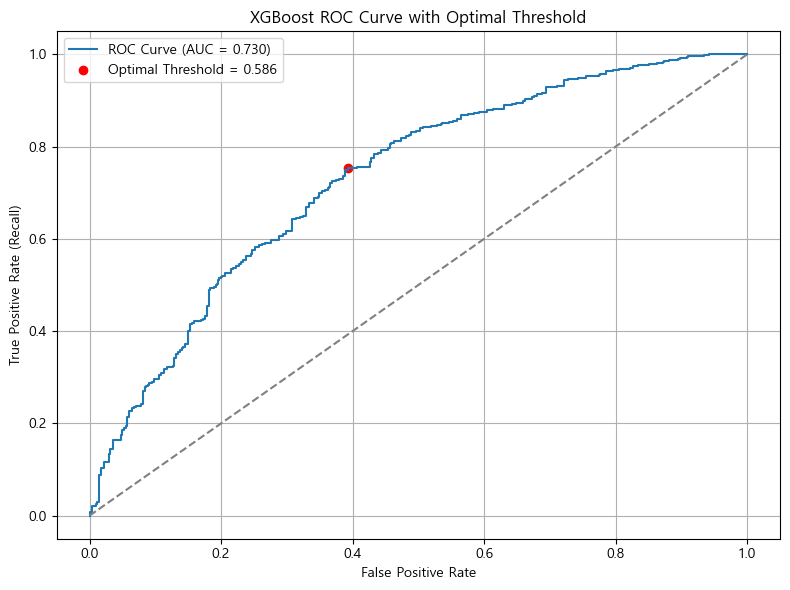

In [132]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba, sample_weight=w_test):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('XGBoost ROC Curve with Optimal Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

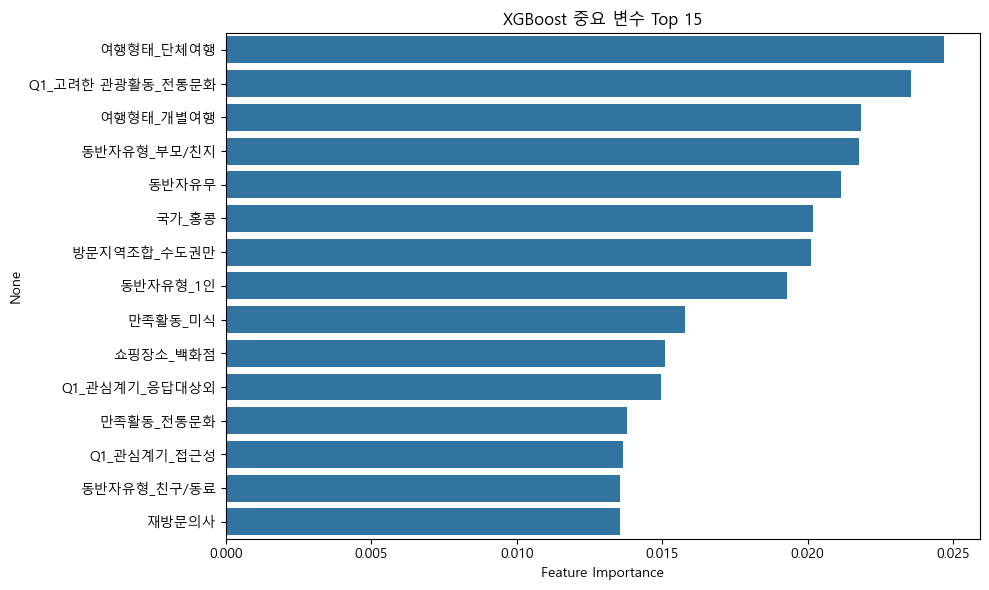

In [133]:
importances = pd.Series(model.feature_importances_, index=X.columns)
top_n = 15
top_features = importances.sort_values(ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title(f'XGBoost Ï§ëÏöî Î≥ÄÏàò Top {top_n}')
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

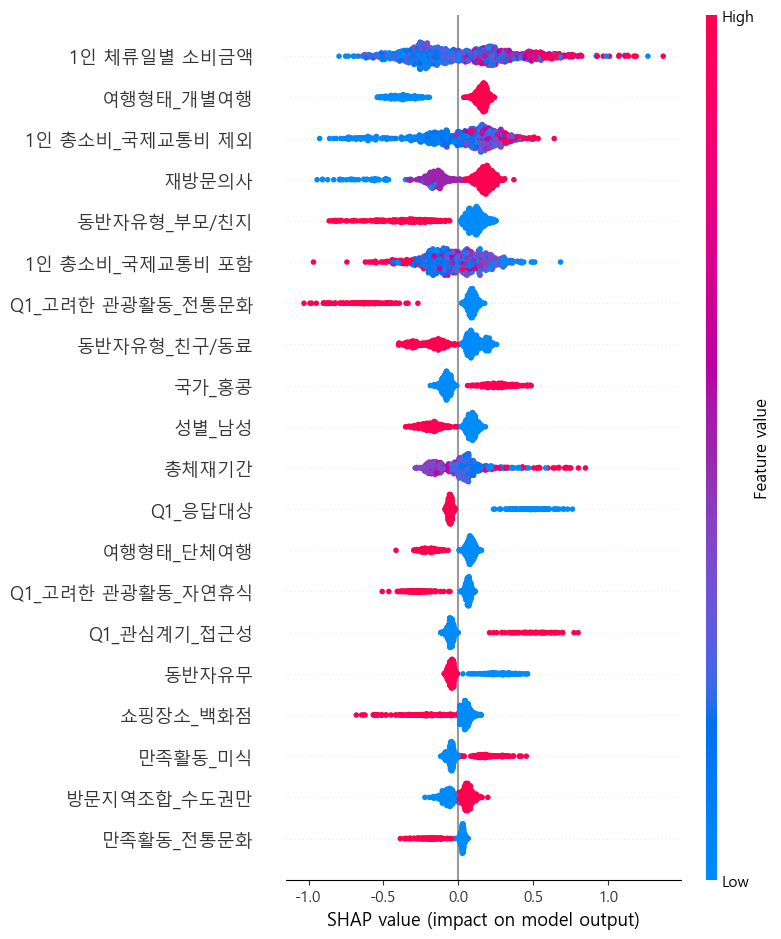

In [134]:
explainer = shap.Explainer(model)

# test ÏÑ∏Ìä∏Ïóê ÎåÄÌïú SHAP Í∞í Í≥ÑÏÇ∞
shap_values = explainer(X_test)


shap.summary_plot(shap_values, X_test, plot_type="dot")

In [135]:
import pandas as pd
import numpy as np
import shap

# 1. SHAP Í≥ÑÏÇ∞ (ÎÑàÍ∞Ä Ïù¥ÎØ∏ Ïã§ÌñâÌïú Î∂ÄÎ∂Ñ)
# explainer = shap.Explainer(model)
# shap_values = explainer(X_test)

# 2. SHAP Í∞íÏùÑ numpy Î∞∞Ïó¥Î°ú Ï∂îÏ∂ú
shap_array = shap_values.values  # (n_samples, n_features)
shap_df = pd.DataFrame(shap_array, columns=X_test.columns)

# 3. ÌÜµÍ≥Ñ ÏöîÏïΩ
summary = pd.DataFrame({
    'feature': X_test.columns,
    'mean_abs_shap': np.abs(shap_array).mean(axis=0),
    'mean_shap': shap_array.mean(axis=0),
    'std_shap': shap_array.std(axis=0),
    'positive_ratio': (shap_array > 0).mean(axis=0)
})

# 4. Î∞©Ìñ•ÏÑ± Î∂ÑÎ•ò
summary['directionality'] = np.where(summary['positive_ratio'] > 0.9, 'strong_positive',
                            np.where(summary['positive_ratio'] < 0.1, 'strong_negative', 'neutral'))

# 5. ÏòÅÌñ•Î†• ÏÉÅÏúÑ Î≥ÄÏàò ÌïÑÌÑ∞ÎßÅ
threshold = summary['mean_abs_shap'].quantile(0.8)
top_influential = summary[summary['mean_abs_shap'] > threshold]

# 6. Ïù¥ÏßÑ Î≥ÄÏàòÎßå ÌïÑÌÑ∞ÎßÅ (0/1Îßå Ï°¥Ïû¨ÌïòÎäî Î≥ÄÏàò)
binary_cols = [col for col in X_test.columns if set(X_test[col].dropna().unique()).issubset({0, 1})]
summary_binary = top_influential[top_influential['feature'].isin(binary_cols)]

# 7. Ï∂úÎ†•
print("üéØ SHAP Í∏∞Î∞ò Ï†ïÏ±Ö Í∞úÏûÖ Í∞ÄÎä• ÌõÑÎ≥¥ Î≥ÄÏàò (0/1 Î≥ÄÏàò Ï§ë ÏòÅÌñ•Î†• ÏÉÅÏúÑ + Î∞©Ìñ•ÏÑ± Î™ÖÌôïÌïú Í≤É):")
summary_binary[['feature', 'mean_abs_shap', 'mean_shap', 'directionality']].sort_values('mean_abs_shap', ascending=False)


üéØ SHAP Í∏∞Î∞ò Ï†ïÏ±Ö Í∞úÏûÖ Í∞ÄÎä• ÌõÑÎ≥¥ Î≥ÄÏàò (0/1 Î≥ÄÏàò Ï§ë ÏòÅÌñ•Î†• ÏÉÅÏúÑ + Î∞©Ìñ•ÏÑ± Î™ÖÌôïÌïú Í≤É):


feature  mean_abs_shap  mean_shap   directionality
0           Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ       0.209564   0.032950          neutral
48        ÎèôÎ∞òÏûêÏú†Ìòï_Î∂ÄÎ™®/ÏπúÏßÄ       0.174292  -0.000562          neutral
20   Q1_Í≥†Î†§Ìïú Í¥ÄÍ¥ëÌôúÎèô_Ï†ÑÌÜµÎ¨∏Ìôî       0.155628   0.005659          neutral
50        ÎèôÎ∞òÏûêÏú†Ìòï_ÏπúÍµ¨/ÎèôÎ£å       0.142947   0.000150          neutral
98              Íµ≠Í∞Ä_ÌôçÏΩ©       0.134407   0.017782          neutral
100             ÏÑ±Î≥Ñ_ÎÇ®ÏÑ±       0.122446  -0.005570          neutral
3             Q1_ÏùëÎãµÎåÄÏÉÅ       0.112679   0.016522          neutral
2           Ïó¨ÌñâÌòïÌÉú_Îã®Ï≤¥Ïó¨Ìñâ       0.104116   0.022553          neutral
19   Q1_Í≥†Î†§Ìïú Í¥ÄÍ¥ëÌôúÎèô_ÏûêÏó∞Ìú¥Ïãù       0.099740   0.009560          neutral
8         Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Ï†ëÍ∑ºÏÑ±       0.088616  -0.008825  strong_negative
44              ÎèôÎ∞òÏûêÏú†Î¨¥       0.086258   0.004139          neutral
73           ÏáºÌïëÏû•ÏÜå_Î∞±ÌôîÏ†ê       0.080062   0.003914          neutral
53            ÎßåÏ°±ÌôúÎèô_ÎØ∏Ïãù       0.079512  -0.002231          neutral
63        Î∞©Î¨∏ÏßÄÏó≠Ï°∞Ìï©_ÏàòÎèÑÍ∂åÎßå       0.063851   0.006765          neutral
60          ÎßåÏ°±ÌôúÎèô_Ï†ÑÌÜµÎ¨∏Ìôî       0.054800  -0.007461          neutral
6       Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Î¨∏ÌôîÏΩòÌÖêÏ∏†       0.054293   0.004226          neutral
62      Î∞©Î¨∏ÏßÄÏó≠Ï°∞Ìï©_ÏàòÎèÑÍ∂å+ÏßÄÎ∞©       0.048846  -0.003193          neutral
33          Ï†ïÎ≥¥ÏàòÏßë_Ïò§ÌîÑÎùºÏù∏       0.043553   0.004988          neutral
22       Q1_Í¥ÄÍ¥ëÏù∏ÌîÑÎùº_Í≤ΩÏ†úÏÑ±       0.040727  -0.005017          neutral

In [136]:
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []

for train_idx, test_idx in cv.split(X, y):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
    w_tr, w_te = weights.iloc[train_idx], weights.iloc[test_idx]

    model_cv = XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )

    model_cv.fit(X_tr, y_tr, sample_weight=w_tr)
    y_prob = model_cv.predict_proba(X_te)[:, 1]
    auc = roc_auc_score(y_te, y_prob, sample_weight=w_te)
    auc_scores.append(auc)

print("‚ñ∂ Cross-Validation AUC Scores:", auc_scores)
print("‚ñ∂ Mean AUC:", np.mean(auc_scores))
print("‚ñ∂ Std AUC :", np.std(auc_scores))

‚ñ∂ Cross-Validation AUC Scores: [0.7156774158875563, 0.7120634497504696, 0.7343921132864599, 0.722244484186293, 0.696114183215319]
‚ñ∂ Mean AUC: 0.7160983292652195
‚ñ∂ Std AUC : 0.012555964863310369


### (2) Í∑∏Î¶¨Îìú ÏÑúÏπò Î™®Îç∏

| Îã®Í≥Ñ | ÌååÎùºÎØ∏ÌÑ∞                               | ÏÑ§Î™Ö          |
| -- | ---------------------------------- | ----------- |
| ‚ë†  | `max_depth`, `min_child_weight`    | Î™®Îç∏ Î≥µÏû°ÎèÑ Ï°∞Ï†à   |
| ‚ë°  | `subsample`, `colsample_bytree`    | Í≥ºÏ†ÅÌï© Î∞©ÏßÄ      |
| ‚ë¢  | `learning_rate`, `n_estimators`    | ÌïôÏäµ ÏÜçÎèÑ/ÌöüÏàò Ï°∞Ï†à |
| ‚ë£  | `gamma`, `reg_alpha`, `reg_lambda` | Í∑úÏ†ú Ï°∞Ï†à       |


In [137]:
# 1Îã®Í≥Ñ ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
param_grid_1 = {
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5]
}

# Í∏∞Î≥∏ Î™®Îç∏
xgb_clf = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=1,
    colsample_bytree=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search_1 = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_1,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_1.fit(X_train, y_train, sample_weight=w_train)

print("Best Parameters:", grid_search_1.best_params_)
print("Best AUC Score:", grid_search_1.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 3, 'min_child_weight': 1}
Best AUC Score: 0.6988111834875653


In [138]:
# 1Îã®Í≥Ñ Í≤∞Í≥º Î∞òÏòÅ
best_model_1 = grid_search_1.best_estimator_
best_max_depth        = best_model_1.get_params()['max_depth']
best_min_child_weight = best_model_1.get_params()['min_child_weight']

# 2Îã®Í≥Ñ ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
param_grid_2 = {
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# 1Îã®Í≥Ñ ÏµúÏ†ÅÍ∞íÏùÑ Í≥†Ï†ïÌïú Î™®Îç∏
xgb_clf_2 = XGBClassifier(
    max_depth=best_max_depth,
    min_child_weight=best_min_child_weight,
    learning_rate=0.1,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search_2 = GridSearchCV(
    estimator=xgb_clf_2,
    param_grid=param_grid_2,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_2.fit(X_train, y_train, sample_weight=w_train)

print("Best Parameters (2Îã®Í≥Ñ):", grid_search_2.best_params_)
print("Best AUC Score:", grid_search_2.best_score_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters (2Îã®Í≥Ñ): {'colsample_bytree': 0.6, 'subsample': 0.8}
Best AUC Score: 0.7042977621241834


In [139]:
# 2Îã®Í≥ÑÍπåÏßÄ Í≤∞Í≥º Î∞òÏòÅ
best_model_2 = grid_search_2.best_estimator_
best_max_depth        = best_model_2.get_params()['max_depth']
best_min_child_weight = best_model_2.get_params()['min_child_weight']
best_subsample        = best_model_2.get_params()['subsample']
best_colsample_bytree = best_model_2.get_params()['colsample_bytree']

# 3Îã®Í≥Ñ ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
param_grid_3 = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

# Ïù¥Ï†Ñ ÏµúÏ†ÅÍ∞íÏùÑ Í≥†Ï†ïÌïú Î™®Îç∏
xgb_clf_3 = XGBClassifier(
    max_depth=best_max_depth,
    min_child_weight=best_min_child_weight,
    subsample=best_subsample,
    colsample_bytree=best_colsample_bytree,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search_3 = GridSearchCV(
    estimator=xgb_clf_3,
    param_grid=param_grid_3,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_3.fit(X_train, y_train, sample_weight=w_train)

print("Best Parameters (3Îã®Í≥Ñ):", grid_search_3.best_params_)
print("Best AUC Score:", grid_search_3.best_score_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters (3Îã®Í≥Ñ): {'learning_rate': 0.05, 'n_estimators': 100}
Best AUC Score: 0.7128322519001972


In [140]:
# 3Îã®Í≥ÑÍπåÏßÄ Í≤∞Í≥º Î∞òÏòÅ
best_model_3 = grid_search_3.best_estimator_
best_max_depth        = best_model_3.get_params()['max_depth']
best_min_child_weight = best_model_3.get_params()['min_child_weight']
best_subsample        = best_model_3.get_params()['subsample']
best_colsample_bytree = best_model_3.get_params()['colsample_bytree']
best_learning_rate    = best_model_3.get_params()['learning_rate']
best_n_estimators     = best_model_3.get_params()['n_estimators']

# 4Îã®Í≥Ñ ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
param_grid_4 = {
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1.0],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

# Ïù¥Ï†Ñ ÏµúÏ†ÅÍ∞íÏùÑ Í≥†Ï†ïÌïú Î™®Îç∏
xgb_clf_4 = XGBClassifier(
    max_depth=best_max_depth,
    min_child_weight=best_min_child_weight,
    subsample=best_subsample,
    colsample_bytree=best_colsample_bytree,
    learning_rate=best_learning_rate,
    n_estimators=best_n_estimators,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search_4 = GridSearchCV(
    estimator=xgb_clf_4,
    param_grid=param_grid_4,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_4.fit(X_train, y_train, sample_weight=w_train)

print("Best Parameters (4Îã®Í≥Ñ):", grid_search_4.best_params_)
print("Best AUC Score:", grid_search_4.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters (4Îã®Í≥Ñ): {'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 0.5}
Best AUC Score: 0.7128460545948018


In [141]:
best_model = grid_search_4.best_estimator_

In [142]:
best_params_4 = grid_search_4.best_params_

best_max_depth        = best_model.get_params()['max_depth']
best_min_child_weight = best_model.get_params()['min_child_weight']
best_subsample        = best_model.get_params()['subsample']
best_colsample_bytree = best_model.get_params()['colsample_bytree']
best_learning_rate    = best_model.get_params()['learning_rate']
best_n_estimators     = best_model.get_params()['n_estimators']
best_gamma            = best_params_4.get('gamma', 0)
best_reg_alpha        = best_params_4.get('reg_alpha', 0)
best_reg_lambda       = best_params_4.get('reg_lambda', 1)

In [143]:
print("‚ñ∂ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞")
print(f"max_depth        = {best_max_depth}")
print(f"min_child_weight = {best_min_child_weight}")
print(f"subsample        = {best_subsample}")
print(f"colsample_bytree = {best_colsample_bytree}")
print(f"learning_rate    = {best_learning_rate}")
print(f"n_estimators     = {best_n_estimators}")
print(f"gamma            = {best_gamma}")
print(f"reg_alpha        = {best_reg_alpha}")
print(f"reg_lambda       = {best_reg_lambda}")

‚ñ∂ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞
max_depth        = 3
min_child_weight = 1
subsample        = 0.8
colsample_bytree = 0.6
learning_rate    = 0.05
n_estimators     = 100
gamma            = 0
reg_alpha        = 0.1
reg_lambda       = 0.5


In [144]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba, sample_weight=w_test)
youden_index = tpr - fpr
optimal_idx = youden_index.argmax()
optimal_threshold = thresholds[optimal_idx]

y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)

print(f"\n‚ñ∂ [XGBoost Í≤∞Í≥º: Threshold = {optimal_threshold:.3f}]")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"Precision    : {precision_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"Recall       : {recall_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"F1 Score     : {f1_score(y_test, y_pred_adjusted, sample_weight=w_test):.3f}")
print(f"ROC AUC      : {roc_auc_score(y_test, y_proba, sample_weight=w_test):.3f}")

print("\n‚ñ∂ [Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏]")
print(classification_report(y_test, y_pred_adjusted, sample_weight=w_test, digits=3))
print("\n‚ñ∂ [ÌòºÎèô ÌñâÎ†¨]")
print(confusion_matrix(y_test, y_pred_adjusted))


‚ñ∂ [XGBoost Í≤∞Í≥º: Threshold = 0.599]
Accuracy     : 0.702
Precision    : 0.771
Recall       : 0.726
F1 Score     : 0.748
ROC AUC      : 0.742

‚ñ∂ [Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏]
              precision    recall  f1-score   support

           0      0.611     0.666     0.637 257736.8299999999
           1      0.771     0.726     0.748 398690.6599999995

    accuracy                          0.702 656427.4899999994
   macro avg      0.691     0.696     0.693 656427.4899999994
weighted avg      0.708     0.702     0.704 656427.4899999994


‚ñ∂ [ÌòºÎèô ÌñâÎ†¨]
[[195 122]
 [138 392]]


ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò:
Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä
1    1766
0    1055
Name: count, dtype: int64

ÌÅ¥ÎûòÏä§Î≥Ñ ÎπÑÏú® (%):
Ïû¨Î∞©Î¨∏Ïó¨Î∂Ä
1    62.6
0    37.4
Name: proportion, dtype: float64


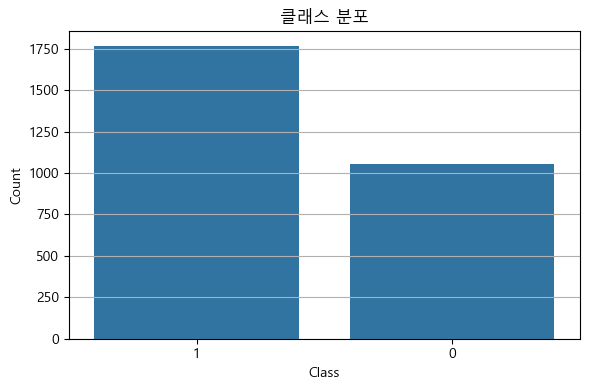

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ Í∞úÏàò
class_counts = y.value_counts()
class_percent = y.value_counts(normalize=True) * 100

print("ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò:")
print(class_counts)
print("\nÌÅ¥ÎûòÏä§Î≥Ñ ÎπÑÏú® (%):")
print(class_percent.round(2))

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values)
plt.title("ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

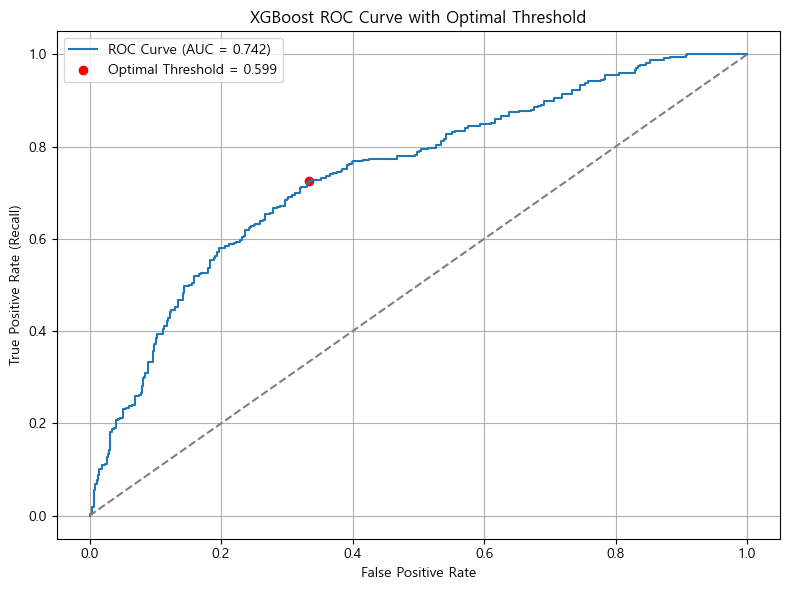

In [146]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba, sample_weight=w_test):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('XGBoost ROC Curve with Optimal Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

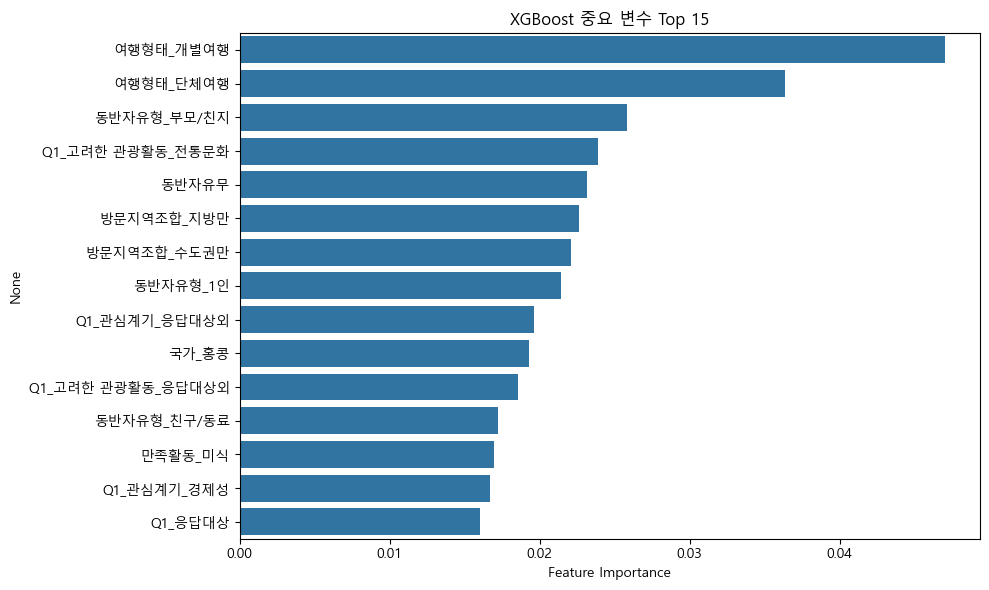

In [147]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_n = 15
top_features = importances.sort_values(ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title(f'XGBoost Ï§ëÏöî Î≥ÄÏàò Top {top_n}')
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

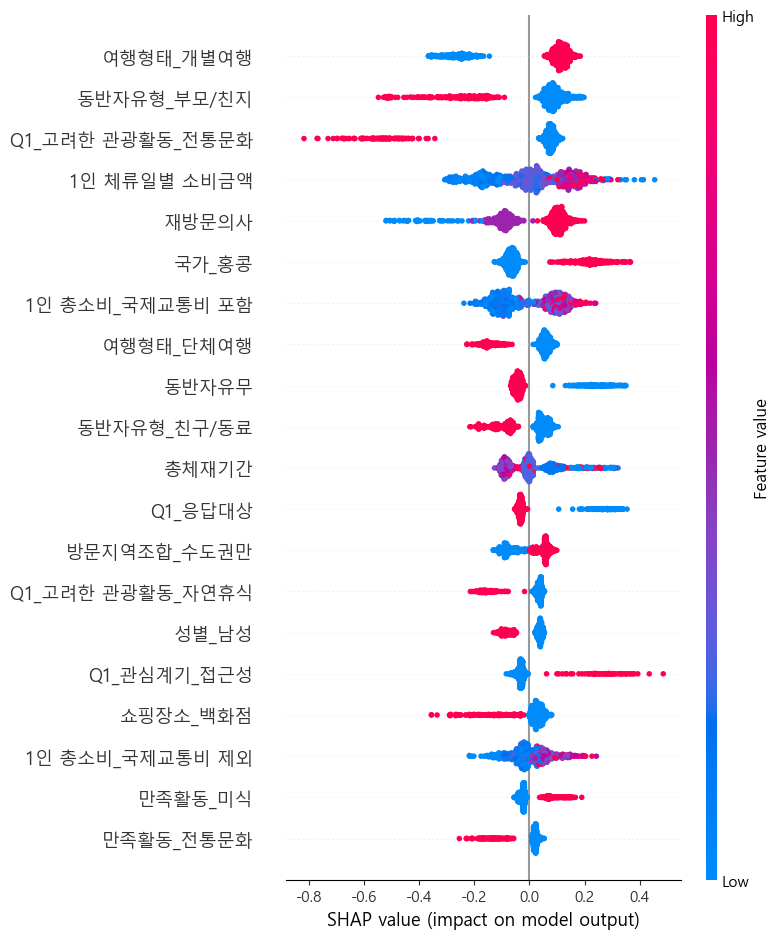

In [148]:
explainer = shap.Explainer(best_model)

# test ÏÑ∏Ìä∏Ïóê ÎåÄÌïú SHAP Í∞í Í≥ÑÏÇ∞
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="dot")

In [149]:
import pandas as pd
import numpy as np
import shap

# 1. SHAP Í≥ÑÏÇ∞ (ÎÑàÍ∞Ä Ïù¥ÎØ∏ Ïã§ÌñâÌïú Î∂ÄÎ∂Ñ)
# explainer = shap.Explainer(model)
# shap_values = explainer(X_test)

# 2. SHAP Í∞íÏùÑ numpy Î∞∞Ïó¥Î°ú Ï∂îÏ∂ú
shap_array = shap_values.values  # (n_samples, n_features)
shap_df = pd.DataFrame(shap_array, columns=X_test.columns)

# 3. ÌÜµÍ≥Ñ ÏöîÏïΩ
summary = pd.DataFrame({
    'feature': X_test.columns,
    'mean_abs_shap': np.abs(shap_array).mean(axis=0),
    'mean_shap': shap_array.mean(axis=0),
    'std_shap': shap_array.std(axis=0),
    'positive_ratio': (shap_array > 0).mean(axis=0)
})

# 4. Î∞©Ìñ•ÏÑ± Î∂ÑÎ•ò
summary['directionality'] = np.where(summary['positive_ratio'] > 0.9, 'strong_positive',
                            np.where(summary['positive_ratio'] < 0.1, 'strong_negative', 'neutral'))

# 5. ÏòÅÌñ•Î†• ÏÉÅÏúÑ Î≥ÄÏàò ÌïÑÌÑ∞ÎßÅ
threshold = summary['mean_abs_shap'].quantile(0.8)
top_influential = summary[summary['mean_abs_shap'] > threshold]

# 6. Ïù¥ÏßÑ Î≥ÄÏàòÎßå ÌïÑÌÑ∞ÎßÅ (0/1Îßå Ï°¥Ïû¨ÌïòÎäî Î≥ÄÏàò)
binary_cols = [col for col in X_test.columns if set(X_test[col].dropna().unique()).issubset({0, 1})]
summary_binary = top_influential[top_influential['feature'].isin(binary_cols)]

# 7. Ï∂úÎ†•
print("üéØ SHAP Í∏∞Î∞ò Ï†ïÏ±Ö Í∞úÏûÖ Í∞ÄÎä• ÌõÑÎ≥¥ Î≥ÄÏàò (0/1 Î≥ÄÏàò Ï§ë ÏòÅÌñ•Î†• ÏÉÅÏúÑ + Î∞©Ìñ•ÏÑ± Î™ÖÌôïÌïú Í≤É):")
summary_binary[['feature', 'mean_abs_shap', 'mean_shap', 'directionality']].sort_values('mean_abs_shap', ascending=False)


üéØ SHAP Í∏∞Î∞ò Ï†ïÏ±Ö Í∞úÏûÖ Í∞ÄÎä• ÌõÑÎ≥¥ Î≥ÄÏàò (0/1 Î≥ÄÏàò Ï§ë ÏòÅÌñ•Î†• ÏÉÅÏúÑ + Î∞©Ìñ•ÏÑ± Î™ÖÌôïÌïú Í≤É):


feature  mean_abs_shap  mean_shap   directionality
0           Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ       0.149060   0.027114          neutral
48        ÎèôÎ∞òÏûêÏú†Ìòï_Î∂ÄÎ™®/ÏπúÏßÄ       0.131954   0.006430          neutral
20   Q1_Í≥†Î†§Ìïú Í¥ÄÍ¥ëÌôúÎèô_Ï†ÑÌÜµÎ¨∏Ìôî       0.131528   0.004609          neutral
98              Íµ≠Í∞Ä_ÌôçÏΩ©       0.110057   0.015305          neutral
2           Ïó¨ÌñâÌòïÌÉú_Îã®Ï≤¥Ïó¨Ìñâ       0.077518   0.016086          neutral
44              ÎèôÎ∞òÏûêÏú†Î¨¥       0.075477   0.004440          neutral
50        ÎèôÎ∞òÏûêÏú†Ìòï_ÏπúÍµ¨/ÎèôÎ£å       0.067929  -0.002732          neutral
3             Q1_ÏùëÎãµÎåÄÏÉÅ       0.064786   0.008146          neutral
63        Î∞©Î¨∏ÏßÄÏó≠Ï°∞Ìï©_ÏàòÎèÑÍ∂åÎßå       0.059856   0.000479          neutral
19   Q1_Í≥†Î†§Ìïú Í¥ÄÍ¥ëÌôúÎèô_ÏûêÏó∞Ìú¥Ïãù       0.055363   0.003945          neutral
100             ÏÑ±Î≥Ñ_ÎÇ®ÏÑ±       0.053401  -0.003524          neutral
8         Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Ï†ëÍ∑ºÏÑ±       0.052275  -0.008171  strong_negative
73           ÏáºÌïëÏû•ÏÜå_Î∞±ÌôîÏ†ê       0.049058   0.004090          neutral
53            ÎßåÏ°±ÌôúÎèô_ÎØ∏Ïãù       0.039923  -0.002335          neutral
60          ÎßåÏ°±ÌôúÎèô_Ï†ÑÌÜµÎ¨∏Ìôî       0.039806  -0.002602          neutral
62      Î∞©Î¨∏ÏßÄÏó≠Ï°∞Ìï©_ÏàòÎèÑÍ∂å+ÏßÄÎ∞©       0.037727  -0.002801          neutral
33          Ï†ïÎ≥¥ÏàòÏßë_Ïò§ÌîÑÎùºÏù∏       0.024346   0.002959          neutral
45           ÎèôÎ∞òÏûêÏú†Ìòï_1Ïù∏       0.019577   0.001585          neutral
6       Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_Î¨∏ÌôîÏΩòÌÖêÏ∏†       0.017718   0.000475          neutral

In [150]:
# 4Îã®Í≥Ñ ÏµúÏ¢Ö Î™®Îç∏ÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
final_model = XGBClassifier(**best_model.get_params())

In [151]:
# StratifiedKFold Ï†ïÏùò
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# AUC Í∏∞Ï§ÄÏúºÎ°ú ÍµêÏ∞®Í≤ÄÏ¶ù ÏàòÌñâ
cv_scores = cross_val_score(
    final_model,
    X,
    y,
    cv=cv,
    scoring='roc_auc'
)

# Í≤∞Í≥º Ï∂úÎ†•
print("‚ñ∂ Cross-Validation AUC Scores:", cv_scores)
print("‚ñ∂ Mean AUC:", np.mean(cv_scores))
print("‚ñ∂ Std AUC:", np.std(cv_scores))

‚ñ∂ Cross-Validation AUC Scores: [0.73815835 0.73696011 0.7317643  0.71500879 0.71404213]
‚ñ∂ Mean AUC: 0.7271867368059037
‚ñ∂ Std AUC: 0.010563448521599643


### Cluster3 ÏµúÏ¢Ö Î™®Îç∏: Í∑∏Î¶¨Îìú ÏÑúÏπò Î™®Îç∏

### (3) ÏãúÎÆ¨Î†àÏù¥ÏÖò - ÌÉÄÍπÉÏóê ÎåÄÌï¥

In [102]:
df_c3[['Ï¥ùÏ≤¥Ïû¨Í∏∞Í∞Ñ','1Ïù∏ Ï≤¥Î•òÏùºÎ≥Ñ ÏÜåÎπÑÍ∏àÏï°']].describe()

Ï¥ùÏ≤¥Ïû¨Í∏∞Í∞Ñ  1Ïù∏ Ï≤¥Î•òÏùºÎ≥Ñ ÏÜåÎπÑÍ∏àÏï°
count  2821.000000   2821.000000
mean      6.267990    246.894069
std       5.248755    226.678068
min       1.000000      7.540984
25%       5.000000    139.050000
50%       5.000000    199.112000
75%       7.000000    283.325000
max      90.000000   4912.000000

- Ï¥ùÏ≤¥Ïû¨Í∏∞Í∞Ñ Ï§ëÏïôÍ∞í 5Ïùº -> ÌèâÍ∑†ÏùÑ ÎÑòÎèÑÎ°ù +1 or +2 Ìï¥Î≥¥Í∏∞  
- 1Ïù∏ Ï≤¥Î•òÏùºÎ≥Ñ ÏÜåÎπÑÍ∏àÏï° Ï§ëÏïôÍ∞í 199 -> ÌèâÍ∑†ÏùÑ ÎÑòÎèÑÎ°ù +50 Ìï¥Î≥¥Í∏∞

#### Í∞ÄÏ§ëÏπò Î∞òÏòÅ X ver

In [199]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Í∑∏Î¶¨ÎìúÏÑúÏπò ÏµúÏ†Å Î™®Îç∏ Í∏∞Î∞ò ÏãúÎÆ¨Î†àÏù¥ÏÖò ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
target_mask = (
    (y_test == 0) &
    (X_test['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ'] == False) &
    (X_test['Ï¥ùÏ≤¥Ïû¨Í∏∞Í∞Ñ'] <= 5) &
    (X_test['1Ïù∏ Ï≤¥Î•òÏùºÎ≥Ñ ÏÜåÎπÑÍ∏àÏï°'] <= 200)
)
X_target_gs = X_test[target_mask].copy()
proba_before_gs = best_model.predict_proba(X_target_gs)[:, 1]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Îã®Ïùº ÏÑ†ÌÉùÌòï Î≥ÄÏàò Í∑∏Î£π Ï†ïÏùò ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
travel_cols = ['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ', 'Ïó¨ÌñâÌòïÌÉú_ÏóêÏñ¥ÌÖî', 'Ïó¨ÌñâÌòïÌÉú_Îã®Ï≤¥Ïó¨Ìñâ']
interest_cols = [col for col in X_test.columns if col.startswith('Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_') and col != 'Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÏùëÎãµÎåÄÏÉÅ']
activity_cols = [col for col in X_test.columns if col.startswith('Q1_Í≥†Î†§Ìïú Í¥ÄÍ¥ëÌôúÎèô_')]
good_cols = [col for col in X_test.columns if col.startswith('ÎßåÏ°±ÌôúÎèô_')]
bujok_cols = [col for col in X_test.columns if col.startswith('Î∂ÄÏ°±ÌñàÎçò Ï†ïÎ≥¥_')]
information_cols = [col for col in X_test.columns if col.startswith('Ï†ïÎ≥¥ÏàòÏßë_')]
visit_cols = [col for col in X_test.columns if col.startswith('Î∞©Î¨∏ÏßÄÏó≠Ï°∞Ìï©_')]
shopping_cols = [col for col in X_test.columns if col.startswith('ÏáºÌïëÏû•ÏÜå_')]
partner_cols = [col for col in X_test.columns if col.startswith('ÎèôÎ∞òÏûêÏú†Ìòï_')]

# Î≥ÄÏàò Í∞úÏûÖ ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©
X_sim_gs = X_target_gs.copy()

X_sim_gs[travel_cols] = False
X_sim_gs['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ'] = True

X_sim_gs['Ï¥ùÏ≤¥Ïû¨Í∏∞Í∞Ñ'] += 7

X_sim_gs['1Ïù∏ Ï≤¥Î•òÏùºÎ≥Ñ ÏÜåÎπÑÍ∏àÏï°'] += 100

# Î≥ÄÌôî ÌõÑ ÏòàÏ∏° Î∞è ÏöîÏïΩ
proba_after_gs = best_model.predict_proba(X_sim_gs)[:, 1]
delta_gs = proba_after_gs - proba_before_gs

# Ï†ÑÏ≤¥ test ÏÑ∏Ìä∏ Í∏∞Ï§Ä best_modelÏö© threshold Í≥ÑÏÇ∞
y_proba_gs = best_model.predict_proba(X_test)[:, 1]
fpr_gs, tpr_gs, thresholds_gs = roc_curve(y_test, y_proba_gs, sample_weight=w_test)
optimal_idx_gs = (tpr_gs - fpr_gs).argmax()
optimal_threshold_gs = thresholds_gs[optimal_idx_gs]

summary_best = pd.DataFrame({'Before': proba_before_gs, 'After': proba_after_gs, 'Change': delta_gs})
summary_best['Lifted'] = (summary_best['After'] >= optimal_threshold_gs).astype(int)

# Î∂ÑÏÑù ÏöîÏïΩ Ï∂úÎ†•
print("\n[Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ Í∏∞Î∞ò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º ÏöîÏïΩ]")
print(f"‚ñ∂ ÌÉÄÍπÉ Ïàò               : {len(summary_best)}")
print(f"‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî        : {delta_gs.mean():.4f}")
print(f"‚ñ∂ Ïû¨Î∞©Î¨∏ ÌôïÎ•† ÏÉÅÏäπÏûê Ïàò : {summary_best['Lifted'].sum()}Î™Ö")
print(f"‚ñ∂ ÏÉÅÏäπ ÎπÑÏú®             : {summary_best['Lifted'].mean() * 100:.2f}%")
print(f"‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî             : {delta_gs.max():.4f}")
print(f"‚ñ∂ ÏµúÏÜå Î≥ÄÌôî             : {delta_gs.min():.4f}")



[Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ Í∏∞Î∞ò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º ÏöîÏïΩ]
‚ñ∂ ÌÉÄÍπÉ Ïàò               : 31
‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî        : 0.1680
‚ñ∂ Ïû¨Î∞©Î¨∏ ÌôïÎ•† ÏÉÅÏäπÏûê Ïàò : 12Î™Ö
‚ñ∂ ÏÉÅÏäπ ÎπÑÏú®             : 38.71%
‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî             : 0.2934
‚ñ∂ ÏµúÏÜå Î≥ÄÌôî             : -0.1144


#### Í∞ÄÏ§ëÏπò Î∞òÏòÅ O ver

In [200]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï°∞Í±¥Î∂Ä ÌÉÄÍπÉ Ï†ïÏùò ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
target_mask = (
    (y_test == 0) &
    (X_test['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ'] == False) &
    (X_test['Ï¥ùÏ≤¥Ïû¨Í∏∞Í∞Ñ'] <= 5) &
    (X_test['1Ïù∏ Ï≤¥Î•òÏùºÎ≥Ñ ÏÜåÎπÑÍ∏àÏï°'] <= 200)
)
X_target_gs = X_test[target_mask].copy()
weights_target_gs = w_test[target_mask].copy()  # üéØ Í∞ÄÏ§ëÏπò Ï∂îÏ∂ú

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Îã®Ïùº ÏÑ†ÌÉùÌòï Î≥ÄÏàò Í∑∏Î£π Ï†ïÏùò ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
travel_cols = ['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ', 'Ïó¨ÌñâÌòïÌÉú_ÏóêÏñ¥ÌÖî', 'Ïó¨ÌñâÌòïÌÉú_Îã®Ï≤¥Ïó¨Ìñâ']
interest_cols = [col for col in X_test.columns if col.startswith('Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_') and col != 'Q1_Í¥ÄÏã¨Í≥ÑÍ∏∞_ÏùëÎãµÎåÄÏÉÅ']
activity_cols = [col for col in X_test.columns if col.startswith('Q1_Í≥†Î†§Ìïú Í¥ÄÍ¥ëÌôúÎèô_')]
good_cols = [col for col in X_test.columns if col.startswith('ÎßåÏ°±ÌôúÎèô_')]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Î≥ÄÏàò Í∞úÏûÖ ÏãúÎÇòÎ¶¨Ïò§ Ï†ÅÏö© ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
X_sim_gs = X_target_gs.copy()

X_sim_gs[travel_cols] = False
X_sim_gs['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ'] = True

X_sim_gs['Ï¥ùÏ≤¥Ïû¨Í∏∞Í∞Ñ'] += 7

X_sim_gs['1Ïù∏ Ï≤¥Î•òÏùºÎ≥Ñ ÏÜåÎπÑÍ∏àÏï°'] += 100

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏòàÏ∏° Î∞è Î≥ÄÌôîÎüâ Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
proba_before_gs = best_model.predict_proba(X_target_gs)[:, 1]
proba_after_gs = best_model.predict_proba(X_sim_gs)[:, 1]
delta_gs = proba_after_gs - proba_before_gs

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ threshold Í≥ÑÏÇ∞ (Ï†ÑÏ≤¥ test Í∏∞Ï§Ä) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
y_proba_gs = best_model.predict_proba(X_test)[:, 1]
fpr_gs, tpr_gs, thresholds_gs = roc_curve(y_test, y_proba_gs, sample_weight=w_test)
optimal_idx_gs = (tpr_gs - fpr_gs).argmax()
optimal_threshold_gs = thresholds_gs[optimal_idx_gs]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Í≤∞Í≥º ÏöîÏïΩ ÌÖåÏù¥Î∏î ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import pandas as pd
import numpy as np

summary_gs = pd.DataFrame({
    'Before': proba_before_gs,
    'After': proba_after_gs,
    'Change': delta_gs
})
summary_gs['Lifted'] = (summary_gs['After'] >= optimal_threshold_gs).astype(int)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Í∞ÄÏ§ë ÌÜµÍ≥Ñ Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
weights_array_gs = weights_target_gs.to_numpy()
assert len(weights_array_gs) == len(delta_gs), "Í∞ÄÏ§ëÏπòÏôÄ delta Í∏∏Ïù¥ Î∂àÏùºÏπò"

# ÌèâÍ∑† Î≥ÄÌôîÎüâ
weighted_mean_delta_gs = np.average(delta_gs, weights=weights_array_gs)

# ÏÉÅÏäπÏûê Í∞ÄÏ§ëÏπò Ìï©
lifted_weights_gs = weights_array_gs[summary_gs['Lifted'].to_numpy() == 1]
weighted_lifted_sum_gs = lifted_weights_gs.sum()

# Ï†ÑÏ≤¥ Í∞ÄÏ§ë ÌÉÄÍπÉ Ïàò
total_weight_gs = weights_array_gs.sum()

# ÏÉÅÏäπ ÎπÑÏú®
weighted_lifted_ratio_gs = (weighted_lifted_sum_gs / total_weight_gs) * 100

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Î≥ÄÌôîÎüâ ÏµúÎåìÍ∞í/ÏµúÏÜüÍ∞í ÏùëÎãµÏûê ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
top_lift_idx = np.argmax(delta_gs)
bottom_lift_idx = np.argmin(delta_gs)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê Ï§ë Ï°∞Í±¥Î∂Ä ÌÉÄÍπÉ ÎπÑÏ§ë Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
non_repeat_mask_all = (y_test == 0)
total_nonrepeat_weight = w_test[non_repeat_mask_all].sum()
target_weight_ratio_gs = (total_weight_gs / total_nonrepeat_weight) * 100

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏµúÏ¢Ö Ï∂úÎ†• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("\nüìò [Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ Í∏∞Î∞ò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º ÏöîÏïΩ - Í∞ÄÏ§ëÏπò Î∞òÏòÅ]")
print(f"‚ñ∂ Í∞ÄÏ§ë ÌÉÄÍπÉ Ïàò             : {total_weight_gs:.0f}Î™Ö")
print(f"‚ñ∂ Ï°∞Í±¥Î∂Ä ÌÉÄÍπÉ ÎπÑÏ§ë (Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê Ï§ë) : {target_weight_ratio_gs:.2f}%")
print(f"‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî (Í∞ÄÏ§ë)    : {weighted_mean_delta_gs:.4f}")
print(f"‚ñ∂ Ïû¨Î∞©Î¨∏ ÏÉÅÏäπÏûê Ïàò (Í∞ÄÏ§ë)  : {weighted_lifted_sum_gs:.0f}Î™Ö")
print(f"‚ñ∂ ÏÉÅÏäπ ÎπÑÏú® (Í∞ÄÏ§ë)         : {weighted_lifted_ratio_gs:.2f}%")
print(f"‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî                : {delta_gs.max():.4f}")
print(f"‚ñ∂ ÏµúÏÜå Î≥ÄÌôî                : {delta_gs.min():.4f}")
print(f"‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÎåìÍ∞í ÏùëÎãµÏûê Before/After: {proba_before_gs[top_lift_idx]:.4f} ‚Üí {proba_after_gs[top_lift_idx]:.4f}")
print(f"‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÏÜüÍ∞í ÏùëÎãµÏûê Before/After: {proba_before_gs[bottom_lift_idx]:.4f} ‚Üí {proba_after_gs[bottom_lift_idx]:.4f}")



üìò [Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ Í∏∞Î∞ò ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º ÏöîÏïΩ - Í∞ÄÏ§ëÏπò Î∞òÏòÅ]
‚ñ∂ Í∞ÄÏ§ë ÌÉÄÍπÉ Ïàò             : 31756Î™Ö
‚ñ∂ Ï°∞Í±¥Î∂Ä ÌÉÄÍπÉ ÎπÑÏ§ë (Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê Ï§ë) : 12.32%
‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî (Í∞ÄÏ§ë)    : 0.1703
‚ñ∂ Ïû¨Î∞©Î¨∏ ÏÉÅÏäπÏûê Ïàò (Í∞ÄÏ§ë)  : 11377Î™Ö
‚ñ∂ ÏÉÅÏäπ ÎπÑÏú® (Í∞ÄÏ§ë)         : 35.82%
‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî                : 0.2934
‚ñ∂ ÏµúÏÜå Î≥ÄÌôî                : -0.1144
‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÎåìÍ∞í ÏùëÎãµÏûê Before/After: 0.2398 ‚Üí 0.5333
‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÏÜüÍ∞í ÏùëÎãµÏûê Before/After: 0.6210 ‚Üí 0.5066


In [201]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏ ÌôïÎ•† Ï¶ùÍ∞ÄÎüâ Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Îã®ÏúÑ: ÌèâÍ∑† Î≥ÄÌôîÎüâ * Ï†ÑÏ≤¥ÏóêÏÑú Ï∞®ÏßÄÌïòÎäî ÎπÑÏ§ë
overall_delta_gs = (target_weight_ratio_gs / 100) * weighted_mean_delta_gs

print(f"\nüìò [Ï†ÑÏ≤¥ Í¥ÄÏ†êÏóêÏÑúÏùò Ïû¨Î∞©Î¨∏ ÌôïÎ•† ÏÉÅÏäπ Ìö®Í≥º]")
print(f"‚ñ∂ Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê Ï§ë ÌÉÄÍπÉÏù¥ Ï∞®ÏßÄÌïòÎäî ÎπÑÏ§ë       : {target_weight_ratio_gs:.2f}%")
print(f"‚ñ∂ Ìï¥Îãπ ÌÉÄÍπÉÏùò ÌèâÍ∑† Ïû¨Î∞©Î¨∏ ÌôïÎ•† Î≥ÄÌôîÎüâ (Í∞ÄÏ§ë)     : {weighted_mean_delta_gs:.4f}")
print(f"‚ñ∂ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏ ÌôïÎ•† Ï¶ùÍ∞Ä Í∏∞Ïó¨ (ÌÉÄÍπÉ ÎπÑÏ§ë √ó Î≥ÄÌôîÎüâ) : {overall_delta_gs:.4f}")



üìò [Ï†ÑÏ≤¥ Í¥ÄÏ†êÏóêÏÑúÏùò Ïû¨Î∞©Î¨∏ ÌôïÎ•† ÏÉÅÏäπ Ìö®Í≥º]
‚ñ∂ Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê Ï§ë ÌÉÄÍπÉÏù¥ Ï∞®ÏßÄÌïòÎäî ÎπÑÏ§ë       : 12.32%
‚ñ∂ Ìï¥Îãπ ÌÉÄÍπÉÏùò ÌèâÍ∑† Ïû¨Î∞©Î¨∏ ÌôïÎ•† Î≥ÄÌôîÎüâ (Í∞ÄÏ§ë)     : 0.1703
‚ñ∂ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏ ÌôïÎ•† Ï¶ùÍ∞Ä Í∏∞Ïó¨ (ÌÉÄÍπÉ ÎπÑÏ§ë √ó Î≥ÄÌôîÎüâ) : 0.0210


### (4) ÏãúÎÆ¨Î†àÏù¥ÏÖò - Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Í∞ùÏóê ÎåÄÌï¥

#### Í∞ÄÏ§ëÏπò Î∞òÏòÅ X ver

In [192]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏X ÎåÄÏÉÅ: Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# ÎåÄÏÉÅ Ïû¨ÏÇ¨Ïö©
X_non_repeat_gs = X_test[y_test == 0].copy()
proba_before_gs_all = best_model.predict_proba(X_non_repeat_gs)[:, 1]

# Î≥ÄÏàò Í∞úÏûÖ
X_sim_gs_all = X_non_repeat_gs.copy()

X_sim_gs_all[travel_cols] = False
X_sim_gs_all['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ'] = True

X_sim_gs_all['Ï¥ùÏ≤¥Ïû¨Í∏∞Í∞Ñ'] += 7

X_sim_gs_all['1Ïù∏ Ï≤¥Î•òÏùºÎ≥Ñ ÏÜåÎπÑÍ∏àÏï°'] += 100

# ÏòàÏ∏° Î∞è Î≥ÄÌôîÎüâ
proba_after_gs_all = best_model.predict_proba(X_sim_gs_all)[:, 1]
delta_gs_all = proba_after_gs_all - proba_before_gs_all

# best_modelÏö© threshold Ïû¨Í≥ÑÏÇ∞ (Ï†ÑÏ≤¥ test Í∏∞Ï§Ä)
y_proba_gs = best_model.predict_proba(X_test)[:, 1]
fpr_gs, tpr_gs, thresholds_gs = roc_curve(y_test, y_proba_gs, sample_weight=w_test)
optimal_idx_gs = (tpr_gs - fpr_gs).argmax()
optimal_threshold_gs = thresholds_gs[optimal_idx_gs]

summary_gs_all = pd.DataFrame({
    'Before': proba_before_gs_all,
    'After': proba_after_gs_all,
    'Change': delta_gs_all
})
summary_gs_all['Lifted'] = (summary_gs_all['After'] >= optimal_threshold_gs).astype(int)

# Í≤∞Í≥º ÏöîÏïΩ
print("\nüìò [Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò - Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏]")
print(f"‚ñ∂ Ï†ÑÏ≤¥ ÎåÄÏÉÅ Ïàò           : {len(summary_gs_all)}")
print(f"‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî         : {delta_gs_all.mean():.4f}")
print(f"‚ñ∂ Ïû¨Î∞©Î¨∏ Í∞ÄÎä•ÏÑ± ÏÉÅÏäπÏûê Ïàò : {summary_gs_all['Lifted'].sum()}Î™Ö")
print(f"‚ñ∂ ÏÉÅÏäπ ÎπÑÏú®               : {summary_gs_all['Lifted'].mean()*100:.2f}%")
print(f"‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî               : {delta_gs_all.max():.4f}")
print(f"‚ñ∂ ÏµúÏÜå Î≥ÄÌôî               : {delta_gs_all.min():.4f}")



üìò [Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò - Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏]
‚ñ∂ Ï†ÑÏ≤¥ ÎåÄÏÉÅ Ïàò           : 317
‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî         : 0.0877
‚ñ∂ Ïû¨Î∞©Î¨∏ Í∞ÄÎä•ÏÑ± ÏÉÅÏäπÏûê Ïàò : 203Î™Ö
‚ñ∂ ÏÉÅÏäπ ÎπÑÏú®               : 64.04%
‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî               : 0.2934
‚ñ∂ ÏµúÏÜå Î≥ÄÌôî               : -0.1144


#### Í∞ÄÏ§ëÏπò Î∞òÏòÅ O ver

In [193]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏X ÎåÄÏÉÅ: Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# ÎåÄÏÉÅ ÌïÑÌÑ∞
non_repeat_mask_gs = (y_test == 0)
X_non_repeat_gs = X_test[non_repeat_mask_gs].copy()
weights_non_repeat_gs = w_test[non_repeat_mask_gs].copy()

# ÏòàÏ∏° Ï†Ñ ÌôïÎ•†
proba_before_gs_all = best_model.predict_proba(X_non_repeat_gs)[:, 1]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Î≥ÄÏàò Í∞úÏûÖ ÏãúÎÇòÎ¶¨Ïò§ Ï†ÅÏö© ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
X_sim_gs_all = X_non_repeat_gs.copy()

X_sim_gs_all[travel_cols] = False
X_sim_gs_all['Ïó¨ÌñâÌòïÌÉú_Í∞úÎ≥ÑÏó¨Ìñâ'] = True

X_sim_gs_all['Ï¥ùÏ≤¥Ïû¨Í∏∞Í∞Ñ'] += 7

X_sim_gs_all['1Ïù∏ Ï≤¥Î•òÏùºÎ≥Ñ ÏÜåÎπÑÍ∏àÏï°'] += 100

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏòàÏ∏° Î∞è Î≥ÄÌôîÎüâ Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
proba_after_gs_all = best_model.predict_proba(X_sim_gs_all)[:, 1]
delta_gs_all = proba_after_gs_all - proba_before_gs_all

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ threshold Ïû¨Í≥ÑÏÇ∞ (Ï†ÑÏ≤¥ test Í∏∞Ï§Ä) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
y_proba_gs = best_model.predict_proba(X_test)[:, 1]
fpr_gs, tpr_gs, thresholds_gs = roc_curve(y_test, y_proba_gs, sample_weight=w_test)
optimal_idx_gs = (tpr_gs - fpr_gs).argmax()
optimal_threshold_gs = thresholds_gs[optimal_idx_gs]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Í≤∞Í≥º ÏöîÏïΩ ÌÖåÏù¥Î∏î ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import pandas as pd
import numpy as np

summary_gs_all = pd.DataFrame({
    'Before': proba_before_gs_all,
    'After': proba_after_gs_all,
    'Change': delta_gs_all
})
summary_gs_all['Lifted'] = (summary_gs_all['After'] >= optimal_threshold_gs).astype(int)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Í∞ÄÏ§ë ÌÜµÍ≥Ñ Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
weights_array_gs_all = weights_non_repeat_gs.to_numpy()

# ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî (Í∞ÄÏ§ë)
weighted_mean_delta_gs_all = np.average(delta_gs_all, weights=weights_array_gs_all)

# Ïû¨Î∞©Î¨∏ ÏÉÅÏäπÏûê Í∞ÄÏ§ëÏπò Ìï©
lifted_weights_gs_all = weights_array_gs_all[summary_gs_all['Lifted'].to_numpy() == 1]
weighted_lifted_sum_gs_all = lifted_weights_gs_all.sum()

# Ï†ÑÏ≤¥ Í∞ÄÏ§ë ÎåÄÏÉÅ Ïàò
total_weight_gs_all = weights_array_gs_all.sum()

# ÏÉÅÏäπ ÎπÑÏú® (Í∞ÄÏ§ë)
weighted_lifted_ratio_gs_all = (weighted_lifted_sum_gs_all / total_weight_gs_all) * 100

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Î≥ÄÌôîÎüâ ÏµúÎåìÍ∞í/ÏµúÏÜüÍ∞í ÏùëÎãµÏûê ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
top_idx_gs_all = np.argmax(delta_gs_all)
bottom_idx_gs_all = np.argmin(delta_gs_all)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏµúÏ¢Ö Ï∂úÎ†• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("\nüìò [Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò - Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏, Í∞ÄÏ§ëÏπò Î∞òÏòÅ]")
print(f"‚ñ∂ Í∞ÄÏ§ë ÎåÄÏÉÅ Ïàò             : {total_weight_gs_all:.0f}Î™Ö")
print(f"‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî (Í∞ÄÏ§ë)    : {weighted_mean_delta_gs_all:.4f}")
print(f"‚ñ∂ Ïû¨Î∞©Î¨∏ ÏÉÅÏäπÏûê Ïàò (Í∞ÄÏ§ë)  : {weighted_lifted_sum_gs_all:.0f}Î™Ö")
print(f"‚ñ∂ ÏÉÅÏäπ ÎπÑÏú® (Í∞ÄÏ§ë)         : {weighted_lifted_ratio_gs_all:.2f}%")
print(f"‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî                : {delta_gs_all.max():.4f}")
print(f"‚ñ∂ ÏµúÏÜå Î≥ÄÌôî                : {delta_gs_all.min():.4f}")
print(f"‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÎåìÍ∞í ÏùëÎãµÏûê Before/After: {proba_before_gs_all[top_idx_gs_all]:.4f} ‚Üí {proba_after_gs_all[top_idx_gs_all]:.4f}")
print(f"‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÏÜüÍ∞í ÏùëÎãµÏûê Before/After: {proba_before_gs_all[bottom_idx_gs_all]:.4f} ‚Üí {proba_after_gs_all[bottom_idx_gs_all]:.4f}")


üìò [Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò - Í∑∏Î¶¨ÎìúÏÑúÏπò Î™®Îç∏, Í∞ÄÏ§ëÏπò Î∞òÏòÅ]
‚ñ∂ Í∞ÄÏ§ë ÎåÄÏÉÅ Ïàò             : 257737Î™Ö
‚ñ∂ ÌèâÍ∑† ÌôïÎ•† Î≥ÄÌôî (Í∞ÄÏ§ë)    : 0.0940
‚ñ∂ Ïû¨Î∞©Î¨∏ ÏÉÅÏäπÏûê Ïàò (Í∞ÄÏ§ë)  : 154009Î™Ö
‚ñ∂ ÏÉÅÏäπ ÎπÑÏú® (Í∞ÄÏ§ë)         : 59.75%
‚ñ∂ ÏµúÎåÄ Î≥ÄÌôî                : 0.2934
‚ñ∂ ÏµúÏÜå Î≥ÄÌôî                : -0.1144
‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÎåìÍ∞í ÏùëÎãµÏûê Before/After: 0.2398 ‚Üí 0.5333
‚ñ∂ Î≥ÄÌôîÎüâ ÏµúÏÜüÍ∞í ÏùëÎãµÏûê Before/After: 0.6210 ‚Üí 0.5066


In [194]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏ ÌôïÎ•† Ï¶ùÍ∞Ä Í∏∞Ïó¨ Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
overall_delta_gs_all = weighted_mean_delta_gs_all  # Ï†ÑÏ≤¥ ÎåÄÏÉÅÏù¥ÎØÄÎ°ú ÎπÑÏ§ë = 1

print("\nüìò [Ï†ÑÏ≤¥ Í¥ÄÏ†êÏóêÏÑúÏùò Ïû¨Î∞©Î¨∏ ÌôïÎ•† ÏÉÅÏäπ Ìö®Í≥º - Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÎåÄÏÉÅ]")
print(f"‚ñ∂ Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÌèâÍ∑† Ïû¨Î∞©Î¨∏ ÌôïÎ•† Î≥ÄÌôîÎüâ (Í∞ÄÏ§ë): {weighted_mean_delta_gs_all:.4f}")
print(f"‚ñ∂ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏ ÌôïÎ•† Ï¶ùÍ∞Ä Í∏∞Ïó¨                    : {overall_delta_gs_all:.4f}")



üìò [Ï†ÑÏ≤¥ Í¥ÄÏ†êÏóêÏÑúÏùò Ïû¨Î∞©Î¨∏ ÌôïÎ•† ÏÉÅÏäπ Ìö®Í≥º - Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÎåÄÏÉÅ]
‚ñ∂ Ï†ÑÏ≤¥ ÎπÑÏû¨Î∞©Î¨∏Ïûê ÌèâÍ∑† Ïû¨Î∞©Î¨∏ ÌôïÎ•† Î≥ÄÌôîÎüâ (Í∞ÄÏ§ë): 0.0940
‚ñ∂ Ï†ÑÏ≤¥ Ïû¨Î∞©Î¨∏ ÌôïÎ•† Ï¶ùÍ∞Ä Í∏∞Ïó¨                    : 0.0940
